# RandomForest Model

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import cv2
from sklearn.model_selection import validation_curve


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

In [3]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

In [79]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

ValueError: cannot reshape array of size 153600000 into shape (50000,150528)

In [6]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [21]:
## k-NN code 1
# Create and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train2, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test2)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\mo894398\Anaconda3\envs\randomforest\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.1755


In [23]:
## k-NN code 2
from sklearn.metrics import top_k_accuracy_score
probs = knn.predict_proba(x_test2)


In [36]:
## k-NN code 3
top_5 = top_k_accuracy_score(y_test, probs, k=1)
# Sort desc and only extract the top-n
#top_n_category_predictions = np.argsort(probs)[:,:-10-1:-1]
print("top_5_accuracy", top_5)

top_5_accuracy 0.1755


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [9]:

from sklearn.model_selection import GridSearchCV, train_test_split

# ************ Random Forest Classifier using grid search for hyper-parameters ******************
print("\n\n***************************************************************")
print("*****************Random Forest Grid Search*********************")
print("***************************************************************\n")

# Number of trees in random forest
# Using num=2 will significantly reduce run time (~3 min vs ~65 min)
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1700, num = 4)]
n_estimators = [1000]
# Using num=10 will significantly increase run time
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# Using num=2 will significantly reduce run time (~3 min vs ~65 min)
max_depth = [int(x) for x in np.linspace(100, 1200, num = 4)]
# Using num=10 will significantly increase run time
#max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
grid = {'n_estimators': n_estimators,
        'max_depth': max_depth,
        #'criterion': ['gini', 'entropy']
        }

print("The values that will be used for the grid search are:")
print(grid)

print("\n*****Performing the Grid Search of the Hyperparameters*****")
# Create a regressor using values from grid
rf_reg = RandomForestClassifier()
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf_reg, param_grid = grid, cv = 2, n_jobs = -1, verbose = 1)

# Train the classifier
best_grid = grid_search.fit(x_train2,y_train.ravel())

# Make predictions
grid_preds = best_grid.predict(x_test2)

print("The best hyperparameters found during the grid search are:")
print(best_grid.best_params_)



***************************************************************
*****************Random Forest Grid Search*********************
***************************************************************

The values that will be used for the grid search are:
{'n_estimators': [1000], 'max_depth': [100, 466, 833, 1200]}

*****Performing the Grid Search of the Hyperparameters*****
Fitting 2 folds for each of 4 candidates, totalling 8 fits


c:\Users\mo894398\Anaconda3\envs\randomforest\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mo894398\Anaconda3\envs\randomforest\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mo894398\Anaconda3\envs\randomforest\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\mo894398\Anaconda3\envs\randomforest\lib\site-packages\joblib\parallel.py", line 1088, in __call__
    while self

The best hyperparameters found during the grid search are:
{'max_depth': 100, 'n_estimators': 1000}


In [8]:
model=RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth= 100)

In [9]:
model.fit(x_train2,y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=1000)

In [11]:
RandomForest = model

In [9]:
y_pred=RandomForest.predict(x_test2)
y_pred

array([71, 27,  4, ..., 51, 88,  0])

In [10]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.52      0.43      0.47       122
           1       0.39      0.26      0.31       149
           2       0.26      0.25      0.26       103
           3       0.21      0.15      0.18       138
           4       0.20      0.17      0.18       121
           5       0.17      0.21      0.19        82
           6       0.17      0.23      0.20        73
           7       0.28      0.20      0.24       138
           8       0.20      0.33      0.25        60
           9       0.29      0.45      0.35        65
          10       0.07      0.19      0.10        37
          11       0.15      0.58      0.24        26
          12       0.10      0.14      0.12        69
          13       0.06      0.19      0.09        31
          14       0.14      0.25      0.18        57
          15       0.08      0.31      0.13        26
          16       0.26      0.60      0.36        43
          17       0.49    

In [ ]:
matrix = confusion_matrix(y_pred,y_test)

In [ ]:
np.savetxt("probs.csv", probs, delimiter=",")

In [28]:
import pickle
#save model
#pickle.dump(model, open('RandoForest_cifar100__1000Tree_maxDep100.sav', 'wb'))
#load model
loaded_model = pickle.load(open('RandoForest_cifar100_acc26_1000Tree.sav', 'rb'))
#result = loaded_model.score(X_test, Y_test)
RandomForest = loaded_model

In [111]:
from sklearn.metrics import top_k_accuracy_score

probs = RandomForest.predict_proba(x_test2)
top_5 = top_k_accuracy_score(y_test, probs, k=1)
# Sort desc and only extract the top-n
#top_n_category_predictions = np.argsort(probs)[:,:-10-1:-1]
print("top_5_accuracy", top_5)
#print("top_5_values", top_n_category_predictions[1])
#print("correct_clas", y_test[1])

top_5_accuracy 0.2634


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


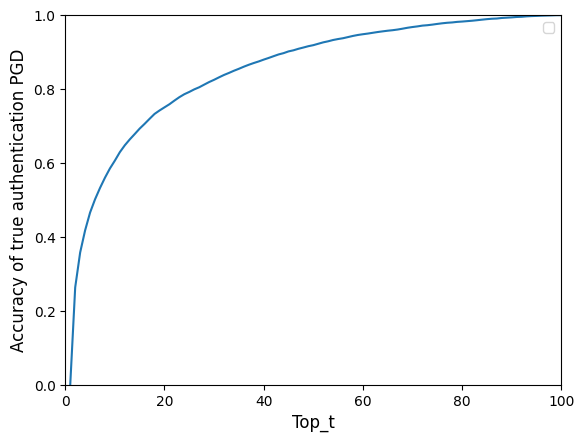

In [11]:
from sklearn.metrics import top_k_accuracy_score
import matplotlib.pyplot as plt
import numpy as np

probs = RandomForest.predict_proba(x_test2)
randomScore = []
for i in range(100):
    top_t = top_k_accuracy_score(y_test, probs, k=i)
    randomScore.append(top_t)

x1 = np.arange(1, 101, 1).tolist()

plt.plot(x1, randomScore, linestyle="-")

plt.xlim(0, 100)
plt.ylim(0, 1)

# naming the x axis
plt.xlabel('Top_t',fontsize=12)

# naming the y axis
plt.ylabel('Accuracy of true authentication PGD',fontsize=12)

plt.legend()
#plt.legend(loc='center right')

plt.show()


# ResNet Model

In [1]:
import pandas as pd
import os
import torch
import time
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import (
    Dataset,
    DataLoader,
    random_split)
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import *
from PIL import Image
import glob

%matplotlib inline


c:\Users\mo894398\Anaconda3\envs\randomforest\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
batch_size = 1
epochs = 120
max_lr = 0.001
grad_clip = 0.01
weight_decay =0.001
opt_func = torch.optim.Adam

In [4]:
train_data = torchvision.datasets.CIFAR100('./', train=True, download=True)

# Stick all the images together to form a 1600000 X 32 X 3 array
x = np.concatenate([np.asarray(train_data[i][0]) for i in range(len(train_data))])

# calculate the mean and std along the (0, 1) axes
mean = np.mean(x, axis=(0, 1))/255
std = np.std(x, axis=(0, 1))/255
# the the mean and std
mean=mean.tolist()
std=std.tolist()

Files already downloaded and verified


In [10]:
print(mean)
print(std)

[0.5070751592371323, 0.48654887331495095, 0.4409178433670343]
[0.26733428587941854, 0.25643846292120615, 0.2761504713263903]


In [5]:
transform_train = tt.Compose([tt.RandomCrop(32, padding=4,padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(),
                         tt.Normalize(mean,std,inplace=True)])
transform_test = tt.Compose([tt.ToTensor(), tt.Normalize(mean,std)])

In [14]:
from torchvision import transforms
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

In [7]:
trainset = torchvision.datasets.CIFAR100("./",
                                         train=True,
                                         download=True,
                                         transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size, shuffle=True, num_workers=2,pin_memory=True)

testset = torchvision.datasets.CIFAR100("./",
                                        train=False,
                                        download=True,
                                        transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size,pin_memory=True, num_workers=2)



Files already downloaded and verified
Files already downloaded and verified


In [15]:
class ImageLoadDataset_test(Dataset):
    """Image dataset."""

    def __init__(self, root_dir, transform=True):
        """
        Args:
            matfile_dir (string): Path to .mat file that contains the metadata of the imagesd
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_dir1=glob.glob(root_dir+'*')
        print (len(self.data_dir1))
        
        self.transform = transform
    def __len__(self):
        return len(self.data_dir1)

    def __getitem__(self, idx):
        img1 = self.data_dir1[idx]
        #img2 = self.data_dir2[idx]
        with open(img1, 'rb') as f:
            img = Image.open(f)
            image1=img.convert('RGB')
        pathSplit = os.path.normpath(img1)
        #with open(img2, 'rb') as f1:
        #    img = Image.open(f1)
        #    image2=img.convert('RGB')        ## Prepare labels
                
        
        if self.transform:
            image1 = self.transform(image1)
        #    image2= self.transform(image2)
        return image1, pathSplit# ,image2,img1,img2

path = "C:/Users/mo894398/Desktop/dataset/cifar100_test/"

#test_data = ImageLoadDataset_test(root_dir=path, transform=transform_test)
testData_vis=ImageLoadDataset_test(root_dir=path,transform=transform_test)
num_train = len(testData_vis)
indices = list(range(num_train))

from torch.utils.data.sampler import SubsetRandomSampler
test_idx=indices
test_sampler = SubsetRandomSampler(test_idx)

testloader = torch.utils.data.DataLoader(
    testData_vis, batch_size, sampler=test_idx, num_workers=0)

#trainloader = DeviceDataLoader(trainloader, device)
#testloader = DeviceDataLoader(testloader, device)
                           

10000


In [ ]:
for i in test_data:
    f, axarr = plt.subplots(1,2)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    print(i[1]) # or 1
    axarr[0].imshow(i[0].detach().cpu().permute(1,2,0))
    print("hi")
    assert False

In [ ]:

def aca(device, test_loader, adv_cout, cifar_names):
    for data, target in testloader:
        data, target = data.to(device), target.to(device)
        concats = str(target.item()) + "_" + str(adv_cout)
        cifar_names.append(concats)
        #transforms.ToPILImage()(data.squeeze()).save(f'adv_Top5classes/FGSM_v10/FGSM/all/{target.item()}_{str(adv_cout)}' + ".jpg")
        adv_cout += 1

In [ ]:
adv_cout = 1
cifar_names = []
asa = aca(device, testloader, adv_cout, cifar_names)

#### Device check and load model into device

In [9]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    
device = get_default_device()
device

device(type='cuda')

In [19]:
trainloader = DeviceDataLoader(trainloader, device)
testloader = DeviceDataLoader(testloader, device)

In [30]:
from models.resnet import resnet34

resnet34 = resnet34()
optimizer = torch.optim.SGD(resnet34.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
resnet34.load_state_dict(torch.load('C:/Users/mo894398/Desktop/dataset/pytorch-cifar100-master/checkpoint/resnet34/Friday_14_April_2023_17h_03m_22s/resnet34-200-regular.pth'))

resnet34.eval()
resnet34.to(device)


ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2_x): Sequential(
    (0): BasicBlock(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

#### Layer Setup 

In [42]:
# Generate testing accuracy, predicted label, confusion matrix, and table for classification report
def test_label_predictions(model, device, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

y_test, y_pred = test_label_predictions(resnet34, device, testloader)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
fs=f1_score(y_test,y_pred,average='weighted')
rs=recall_score(y_test, y_pred,average='weighted')
accuracy=accuracy_score(y_test, y_pred)

print('Confusion matrix:')
print(cm)
print(cr)
print('F1 score: %f' % fs)
print('Recall score: %f' % rs)
print('Accuracy score: %f' % accuracy)


AttributeError: 'tuple' object has no attribute 'to'

In [52]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))
        
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True) 
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) 
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True) 
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) 
        self.conv5 = conv_block(512, 1028, pool=True) 
        self.res3 = nn.Sequential(conv_block(1028, 1028), conv_block(1028, 1028))  
        
        self.classifier = nn.Sequential(nn.MaxPool2d(2), # 1028 x 1 x 1
                                        nn.Flatten(), # 1028 
                                        nn.Linear(1028, num_classes)) # 1028 -> 100
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.res3(out) + out
        out = self.classifier(out)
        return out

model = to_device(ResNet9(3, 100), device)
model

#model = models.alexnet(weights=True).cuda()
#nn.Upsample(scale_factor=7, mode='ne')
#model.eval()

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

#### Training Setup

In [53]:
@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, test_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, test_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [11]:
# Initial evaluation
history = [evaluate(model, testloader)]
history

[{'val_loss': 4.6052350997924805, 'val_acc': 0.009100000374019146}]

In [ ]:
current_time=time.time()
history += fit_one_cycle(int(epochs/8), max_lr, model, trainloader, testloader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)
# Print training time
print('Training time: {:.2f} s'.format(time.time() - current_time))

In [ ]:
Resnet = model

In [54]:
#torch.save(Resnet.state_dict(), "Resnet_Jan16th_last.bt")
#torch.save(optimizer.state_dict(), "hackathon_smart_opt.bt")
model.load_state_dict(torch.load("Resnet_Jan16th_last.pt"))
model.eval()
Resnet = model

# finding top_5 for both models

In [21]:
Resnet_top1_before_attack=[]
#trans_top1_before_attack=[]
right_labels_orgTra = []


with torch.no_grad():
    for i,(img,label) in enumerate(testloader):
        
        embedding=resnet34(img)
        top1 = torch.topk(torch.softmax(embedding,1),1)[1].cuda()

        #embedding=trans_model(img)
        #top1 = torch.topk(torch.softmax(embedding[0],1),1)[1].cuda()

        for x1 in top1:
            Resnet_top1_before_attack.append(x1.cpu().detach().tolist())
            #trans_top1_before_attack.append(x1.cpu().detach().tolist())

        for x2 in label:
            right_labels_orgTra.append([x2.cpu().detach().tolist()])


In [29]:

#RandNo = 0
ResnNo = 0

#for i, j in zip(y_test, top_n_category_predictions):
#    if i in j:
#        RandNo += 1

for i, j in zip(y_test, Resnet_top1_before_attack):
    if i in j:
        ResnNo += 1
   
#print("RandomForest_top10 accuracy:", (RandNo/10000)*100)
print("ResNet_top5 accuracy:", (ResnNo/10000)*100)


ResNet_top5 accuracy: 1.27


In [ ]:
trans_top1_before_attack

RandomForest_top5 accuracy: 42.19
RandomForest_top10 accuracy: 52.66
RandomForest_top20 accuracy: 65.46
ResNet_top5 accuracy: 92.67

#### Prediction

In [ ]:
# Collect training time and result
current_time = time.time()
result = evaluate(model, testloader)
result
print('Training time: {:.2f} s'.format(time.time() - current_time))

In [39]:
# Saving the model to h5 file
#torch.save(model.state_dict(), 'ResNet_cifar100_pretrained_model.h5')
# Loading the model from h5 file
model.load_state_dict(torch.load('ResNet_cifar100_pretrained_model.h5'))
model.eval()

RuntimeError: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "conv2.0.weight", "conv2.0.bias", "conv2.1.weight", "conv2.1.bias", "conv2.1.running_mean", "conv2.1.running_var", "conv2.1.num_batches_tracked", "res1.0.0.weight", "res1.0.0.bias", "res1.0.1.weight", "res1.0.1.bias", "res1.0.1.running_mean", "res1.0.1.running_var", "res1.0.1.num_batches_tracked", "res1.1.0.weight", "res1.1.0.bias", "res1.1.1.weight", "res1.1.1.bias", "res1.1.1.running_mean", "res1.1.1.running_var", "res1.1.1.num_batches_tracked", "conv3.0.weight", "conv3.0.bias", "conv3.1.weight", "conv3.1.bias", "conv3.1.running_mean", "conv3.1.running_var", "conv3.1.num_batches_tracked", "conv4.0.weight", "conv4.0.bias", "conv4.1.weight", "conv4.1.bias", "conv4.1.running_mean", "conv4.1.running_var", "conv4.1.num_batches_tracked", "res2.0.0.weight", "res2.0.0.bias", "res2.0.1.weight", "res2.0.1.bias", "res2.0.1.running_mean", "res2.0.1.running_var", "res2.0.1.num_batches_tracked", "res2.1.0.weight", "res2.1.0.bias", "res2.1.1.weight", "res2.1.1.bias", "res2.1.1.running_mean", "res2.1.1.running_var", "res2.1.1.num_batches_tracked", "conv5.0.weight", "conv5.0.bias", "conv5.1.weight", "conv5.1.bias", "conv5.1.running_mean", "conv5.1.running_var", "conv5.1.num_batches_tracked", "res3.0.0.weight", "res3.0.0.bias", "res3.0.1.weight", "res3.0.1.bias", "res3.0.1.running_mean", "res3.0.1.running_var", "res3.0.1.num_batches_tracked", "res3.1.0.weight", "res3.1.0.bias", "res3.1.1.weight", "res3.1.1.bias", "res3.1.1.running_mean", "res3.1.1.running_var", "res3.1.1.num_batches_tracked", "classifier.2.weight", "classifier.2.bias", "conv1.0.weight", "conv1.0.bias", "conv1.1.weight", "conv1.1.bias", "conv1.1.running_mean", "conv1.1.running_var", "conv1.1.num_batches_tracked". 

In [125]:
# Generate testing accuracy, predicted label, confusion matrix, and table for classification report
def test_label_predictions(model, device, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

y_test, y_pred = test_label_predictions(model, device, testloader)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
fs=f1_score(y_test,y_pred,average='weighted')
rs=recall_score(y_test, y_pred,average='weighted')
accuracy=accuracy_score(y_test, y_pred)

print('Confusion matrix:')
print(cm)
print(cr)
print('F1 score: %f' % fs)
print('Recall score: %f' % rs)
print('Accuracy score: %f' % accuracy)


Confusion matrix:
[[87  0  0 ...  0  0  0]
 [ 0 89  0 ...  0  0  0]
 [ 0  1 63 ...  0  4  0]
 ...
 [ 0  0  0 ... 78  0  0]
 [ 0  0  5 ...  0 50  0]
 [ 0  0  1 ...  0  0 72]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       100
           1       0.82      0.89      0.85       100
           2       0.65      0.63      0.64       100
           3       0.63      0.55      0.59       100
           4       0.53      0.60      0.56       100
           5       0.83      0.72      0.77       100
           6       0.77      0.85      0.81       100
           7       0.79      0.74      0.76       100
           8       0.88      0.85      0.86       100
           9       0.82      0.80      0.81       100
          10       0.63      0.57      0.60       100
          11       0.55      0.47      0.51       100
          12       0.75      0.82      0.78       100
          13       0.68      0.63      0.66       100
          14   

AUC scores: [0.09145050505050505, 0.06277676767676768, 0.1654777777777778, 0.20473888888888891, 0.2534222222222222, 0.13666969696969694, 0.1304540404040404, 0.17550202020202016, 0.14620353535353536, 0.19537020202020203, 0.2790762626262626, 0.2590287878787879, 0.19670050505050507, 0.33611515151515153, 0.21486060606060606, 0.20506161616161617, 0.2231535353535354, 0.22757878787878788, 0.2681954545454545, 0.26939494949494946, 0.24294696969696966, 0.2374944444444444, 0.29291868686868683, 0.2876247474747475, 0.2605272727272727, 0.3249545454545455, 0.3434717171717172, 0.350240404040404, 0.281690404040404, 0.3620686868686868, 0.46351060606060607, 0.3238964646464646, 0.36792474747474746, 0.4216838383838384, 0.36137373737373735, 0.42040606060606067, 0.4088949494949495, 0.39206868686868684, 0.4096090909090909, 0.413110101010101, 0.4321252525252525, 0.4111242424242424, 0.4673318181818182, 0.4422484848484849, 0.4622924242424242, 0.45648030303030307, 0.45686919191919195, 0.5094505050505052, 0.474132

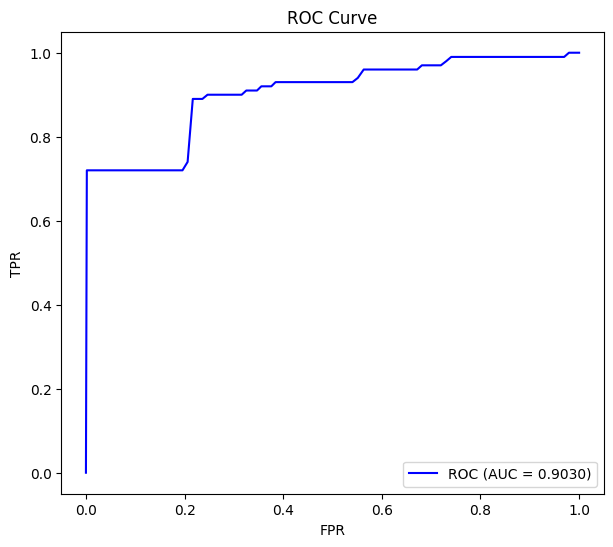

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the AUC score for each class
auc_scores = []
for i in range(100):
    y_true_i = (np.array(y_test) == i)
    y_score_i = np.array(y_pred)
    auc_score_i = roc_auc_score(y_true_i, y_score_i)
    auc_scores.append(auc_score_i)

# Print the AUC scores
print("AUC scores:", auc_scores)

fpr, tpr, _ = roc_curve(y_true_i, y_score_i)
auc_score = roc_auc_score(y_true_i, y_score_i)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [82]:
import torch
import torchvision
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

# Load the CIFAR-100 dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.5071, 0.4865, 0.4409],
        std=[0.2673, 0.2564, 0.2762]
    )
])
cifar100_test_dataset = torchvision.datasets.CIFAR100(
    root="./data", train=False, download=True, transform=transform
)

y_true = []
y_score = []
with torch.no_grad():
    for images, labels in cifar100_test_dataset:
        outputs = Resnet(images.to(device).unsqueeze(0))
        y_true.append(labels)
        y_score.append(torch.topk(torch.softmax(outputs, dim=1).cpu()[0], 1)[0])
y_true = np.array(y_true)
y_score = np.array(y_score)

# Compute the AUC score for each class
auc_scores = []
for i in range(100):
    y_true_i = (y_true == i).astype(int)
    y_score_i = y_score
    auc_score_i = roc_auc_score(y_true_i, y_score_i)
    auc_scores.append(auc_score_i)

# Print the AUC scores
print("AUC scores:", auc_scores)



C:\Users\mo894398\AppData\Local\Temp\ipykernel_16500\3538865451.py:9: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  y_score = np.array(y_score)
C:\Users\mo894398\AppData\Local\Temp\ipykernel_16500\3538865451.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_score = np.array(y_score)


AUC scores: [0.6295111111111111, 0.69375101010101, 0.3743060606060606, 0.30469797979797975, 0.3299111111111111, 0.47030909090909095, 0.5817499999999999, 0.5089424242424242, 0.6886686868686869, 0.6339075757575757, 0.3318444444444445, 0.29008585858585856, 0.5666373737373738, 0.427619696969697, 0.48781868686868685, 0.550800505050505, 0.5138565656565657, 0.6129444444444444, 0.46618030303030306, 0.4372479797979798, 0.7030489898989899, 0.6543176767676768, 0.4783651515151516, 0.5523383838383839, 0.558590909090909, 0.4207858585858586, 0.48355959595959597, 0.34930909090909096, 0.5979590909090909, 0.44443989898989894, 0.40717020202020204, 0.43639343434343436, 0.4969590909090909, 0.4058292929292929, 0.5175404040404039, 0.2587883838383839, 0.5498353535353535, 0.5089474747474747, 0.3840015151515151, 0.6459484848484849, 0.4371712121212121, 0.7287636363636365, 0.5184151515151515, 0.5746212121212121, 0.2954424242424243, 0.3930045454545455, 0.30212424242424246, 0.4242505050505051, 0.7422030303030304, 0

In [83]:
# Compute the macro-averaged AUC score
macro_auc_score = np.mean(auc_scores)
print("Macro-averaged AUC score:", macro_auc_score)

Macro-averaged AUC score: 0.5


In [99]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true_i, y_score_i, pos_label=1)
auc(fpr, tpr)

0.4994919191919192

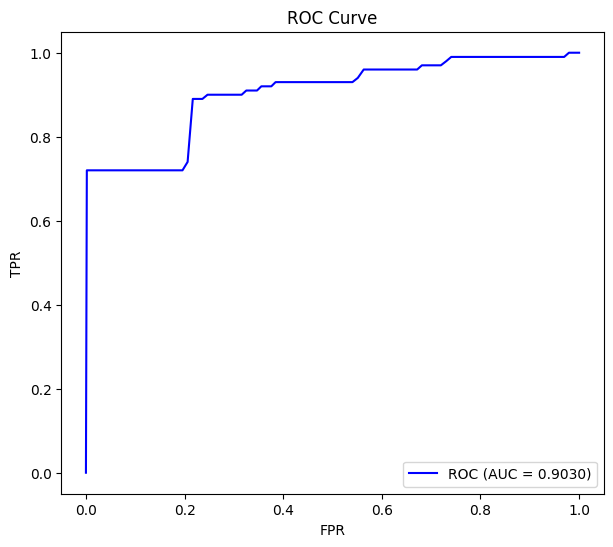

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_true_i, y_score_i)
auc_score = roc_auc_score(y_true_i, y_score_i)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [106]:
y_true

array([49, 33, 72, ..., 51, 42, 70])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


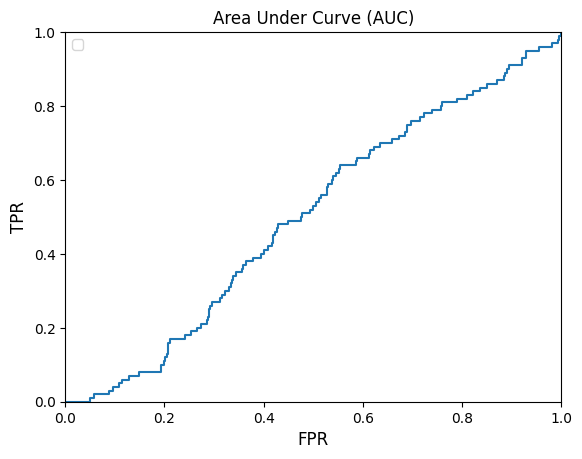

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from shapely import LineString


x1 = np.arange(0, 100, 1).tolist()

plt.plot(fpr, tpr, linestyle="-")
#plt.plot(x1, acc, label = "Healthcare", linestyle="--")
#plt.plot(x1, whole_top_c, label = "Detecting inappropriate content", linestyle=":")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.title('Area Under Curve (AUC)')
# naming the x axis
plt.xlabel('FPR',fontsize=12)

# naming the y axis
plt.ylabel('TPR',fontsize=12)

plt.legend()
#plt.legend(loc='center right')

plt.show()


#the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left-side are better.

In [102]:
len(fpr)

450

In [17]:
pred = torch.tensor([[0.75, 0.05, 0.05, 0.05],
                      [0.05, 0.75, 0.05, 0.05],
                      [0.05, 0.05, 0.75, 0.05],
                      [0.05, 0.05, 0.05, 0.75]])
target = torch.tensor([0, 1, 3, 2])
roc = torchmetrics.ROC(task="multiclass", num_classes=4)
fpr, tpr, thresholds = roc(pred, target)

In [ ]:
# Save classificationreport into csv
report = classification_report(y_test, y_pred, output_dict = True)
df=pd.DataFrame(report).transpose()
df.to_csv('classificationreport.csv',index=False)

In [ ]:
# Plot classification report and save to pdf function
def plot_classification(precision, recall, f1_score):
    plt.rcParams['font.size'] = 12
    plt.rc('axes', linewidth=1.75)
    marker_size = 8
    figsize = 6
    plt.figure(figsize=(1.4 * figsize, figsize))
    plt.subplot(3, 1, 1)
    plt.plot(precision, 'o', markersize=marker_size)
    # plt.legend(loc=0)
    # plt.yticks(np.arange(0.5, 1.01, 0.1))
    plt.ylabel('Precision', fontsize=14)
    plt.xticks([])
    plt.subplot(3, 1, 2)
    plt.plot(recall, 'o', markersize=marker_size)
    # plt.yticks(np.arange(0.5, 1.01, 0.1))
    plt.ylabel('Recall', fontsize=14)
    plt.xticks([])
    plt.subplot(3, 1, 3)
    plt.plot(f1_score, 'o', markersize=marker_size)
    # plt.yticks(np.arange(0.5, 1.01, 0.1))
    plt.ylabel('F1-score', fontsize=14)
    plt.xlabel('Class', fontsize=14)
    plt.subplots_adjust(hspace=0.001)
    plt.tight_layout()
    plt.savefig("classification.pdf")

In [ ]:
# Plot classification report and save to pdf
def plot_confusion_matrix(cm):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.colorbar()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    plt.savefig("confusion_matrix.pdf")
    plt.show()

In [ ]:
# Plot and save confusion matrix
precision, recall, f1,_= precision_recall_fscore_support(y_test, y_pred)
print(recall)
plot_classification(precision, recall, f1)

# Plot confusion matrix
plot_confusion_matrix(cm)

In [ ]:
# Obtain training accuracy
y_train, y_pred2 = test_label_predictions(model, device, trainloader)
train_accuracy=accuracy_score(y_train, y_pred2)
print('Train accuracy: %f' % train_accuracy)

In [ ]:
#x = torch.rand(5, 3, device="cuda")
#print(x)

In [ ]:
#torch.cuda.is_available()

In [ ]:
#!conda list

In [ ]:
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

In [ ]:
#!conda list

### GENERATE Adversarial samples

In [11]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [ ]:
#[0.49139967861519607, 0.48215840839460783, 0.44653091444546567]
#[0.24703223246174102, 0.24348512800151828, 0.26158784172803257]

def img_denorm(img, mean, std):
    #for ImageNet the mean and std are:
    mean = np.asarray(mean)
    std = np.asarray(std)

    denormalize = tt.Normalize((-1 * mean / std), (1.0 / std))
    res = img.squeeze(0)
    res = denormalize(res)

    #Image needs to be clipped since the denormalize function will map some
    #values below 0 and above 1
    res = torch.clamp(res, 0, 1)
    return(res)

In [ ]:
def test( model, device, test_loader, epsilon ):

    # Accuracy counter
    correct_cnt = 0
    adv_cout = 0
    init_count = 0
    adv_examples = []

    correct_n = []
    miss_n = []

    # Loop over all examples in test set
    for (data, target), names in zip(test_loader,cifar_names):

        org_data = torch.clamp(data, 0, 1)
        # Send the data and label to the device

        data, target = data.to(device), label.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, dont bother attacking, just move on
        if init_pred.item() != target.item():
            init_count += 1
            transforms.ToPILImage()(org_data.squeeze()).save(f'adv_Top5classes/FGSM_v6/FGSM/miss/{target.item()}_{str(init_count)}', 'jpeg')
            continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output = model(perturbed_data)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        if final_pred.item() == target.item():
            correct_cnt += 1
            # Special case for saving 0 epsilon examples
            if epsilon == 0:
                adv_ex = org_data.squeeze() #.detach().cpu().numpy()
                #adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
                transforms.ToPILImage()(adv_ex).save(f'adv_Top5classes/FGSM_v6/FGSM/correct/{target.item()}_{str(correct_cnt)}', 'jpeg')

        #elif final_pred.item() != init_pred.item():
        else:
            # Save some adv examples for visualization later
            adv_cout += 1
            adv_ex = perturbed_data.squeeze()
            #print('init:', init_pred.item())
            #print("final:", final_pred.item())
            #adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
            transforms.ToPILImage()(adv_ex).save(f'adv_Top5classes/FGSM_v6/FGSM/adv/{target.item()}_{str(adv_cout)}', 'jpeg')
        

    # Calculate final accuracy for this epsilon
    final_acc = correct_cnt/float(len(test_loader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct_cnt, len(test_loader), final_acc))
    print("no of adv samplesL               :", adv_cout)
    print("no. of originaly missed classfied:", init_count)
    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

In [12]:
import torchattacks
from torchvision import transforms
def test( model, device, test_loader, epsilon ):
    
    # Accuracy counter
    correct_cnt = 0
    adv_cout = 0
    init_count = 0
    counter_10k = 0
    
    adv_examples = []
    initLabel_1 = []
    initLabel_2 = []
    initLabel_3 = []

    indd = 0
    
#[0.5070751592371323, 0.48654887331495095, 0.4409178433670343]
#[0.26733428587941854, 0.25643846292120615, 0.2761504713263903]

    # Loop over all examples in test set
    for data, targetLabel in test_loader:
    #for (data, target), names in zip(test_loader,cifar_names):

        org_data_toSave = data
        #org_data_toSave = torch.clamp(data, 0, 1)
        org_data = torch.clamp(data, 0, 1)

        labels = targetLabel[0].split(os.sep)
        sampleName = labels[6]
        labels = labels[6].split("_")
        label = labels[0]

        label = torch.tensor([int(label)])
        # Send the data and label to the device
        data, target = data.to(device), label.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output[0].max(1, keepdim=True)[1] # get the index of the max log-probability
        # If the initial prediction is wrong, dont bother attacking, just move on
        
        #print(type(str(init_pred.item())))
        #print(type(target))
        
        #indd +=1
    
        #if indd == 20:
        #    assert False
        if init_pred.item() != target:
            init_count += 1
            #miss_n.append(names)
            #transforms.ToPILImage()(org_data_toSave.squeeze()* 0.47 + 0.26).save(f'adv_Top5classes/FGSM_v9/FGSM/miss/{target.item()}_{str(init_count)}' + ".jpg")
            #transforms.ToPILImage()(img_denorm(org_data_toSave, mean, std)).save(f'adv_Top5classes/FGSM_v10/FGSM/miss/{target.item()}_{str(init_count)}' + ".jpg")
            #transforms.ToPILImage()(org_data_toSave.squeeze()).save(f'adv_Top5classes/FGSM_v10/FGSM/miss/{target.item()}_{str(init_count)}' + ".jpg")
            miss_paths.append(targetLabel[0])
            miss_labels.append(init_pred.item())
            continue
        
        # Calculate the loss
        loss = F.nll_loss(output[0], target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        ## Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)   ################
        ## Re-classify the perturbed image
        output = model(perturbed_data)    ################


        ## Call Deepfool attack
        #attack = torchattacks.DeepFool(model, steps=50, overshoot=0.02) ################
        #attack = torchattacks.PGD(model, eps=8/255, alpha=1/255, steps=40, random_start=True)

        ## generate adversarial image
        #adv_img = attack(data, target) #label.unsqueeze(0)      #############
        ## generate the label for adversarial image
        #output=model(adv_img)       #################
        ## pick the class with the top score
        # adv_label=output.max(1, keepdim=True)[1]
        ## collect top5 classes

        # Check for success
        final_pred = output[0].max(1, keepdim=True)[1] # get the index of the max log-probability

        if final_pred.item() == target:
            correct_cnt += 1
            # Special case for saving 0 epsilon examples
            #if epsilon == 0:
            #adv_ex = perturbed_data.squeeze().detach().cpu().numpy() #.detach().cpu().numpy()
            #adv_ex = perturbed_data.squeeze()
                #adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
            #correct_n.append(names)
            #transforms.ToPILImage()(img_denorm(org_data_toSave, mean, std)).save(f'adv_Top5classes/FGSM_v10/FGSM/correct/{target.item()}_{str(correct_cnt)}' + ".jpg")
            #initLabel_1.append([target.item()])
            correct_paths.append(targetLabel[0])
            correct_labels.append(final_pred.item())

#(10000, 32, 32, 3)
            #xx_test = adv_ex /255.0
            #nx, ny, nrgb = xx_test.shape
            #x_test2 = xx_test.reshape((nx*ny*nrgb))
            #probs = RandomForest.predict_proba(x_test2.reshape(1, -1))
            #top_10 = top_k_accuracy_score(target.item(), probs, k=10)
            #probs_correct.append(probs)

        #elif final_pred.item() != init_pred.item():
        else:
            # Save some adv examples for visualization later
            adv_cout += 1
            #adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
            #adv_ex = perturbed_data.squeeze()

            #print('init:', init_pred.item())
            #print("final:", final_pred.item())
            #initLabel_3.append([final_pred.item()]) #final_pred.item()
            #adv_n.append(names)
            #transforms.ToPILImage()(perturbed_data.squeeze()).save(f'adv_Top5classes/trasformer/fgsm_v2/{str(int(target))}_{str(adv_cout)}' + ".jpg")
            transforms.ToPILImage()(perturbed_data.squeeze()).save(f'adv_Top5classes/transformer/fgsm_v2/{sampleName}' + ".jpg")
            adv_paths.append(targetLabel[0])
            adv_labels.append(final_pred.item())

            #xx_test = adv_ex /255.0
            #nx, ny, nrgb = xx_test.shape
            #x_test2 = xx_test.reshape((nx*ny*nrgb))
            #probs = RandomForest.predict_proba(x_test2.reshape(1, -1))
            #top_10 = top_k_accuracy_score(target.item(), probs, k=10)
            #probs_adv.append(probs)

    # Calculate final accuracy for this epsilon
    final_acc = correct_cnt/float(len(test_loader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct_cnt, len(test_loader), final_acc))
    print("no of adv samplesL               :", adv_cout)
    print("no. of originaly missed classfied:", init_count)
    # Return the accuracy and an adversarial example
    return final_acc, adv_examples, initLabel_1, initLabel_2, initLabel_3
            
"""
        if init_pred.item() != target.item():
            init_count += 1
            #adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
            adv_ex = perturbed_data.squeeze()

            transforms.ToPILImage()(adv_ex).save(f'adv_Top5classes/FGSM_v8/FGSM/miss/{target.item()}_{str(init_count)}' + ".jpg")
            initLabel_2.append([init_pred.item()]) #init_pred.item()

            xx_test = adv_ex /255.0
            nx, ny, nrgb = xx_test.shape
            x_test2 = xx_test.reshape((nx*ny*nrgb))
            #probs = RandomForest.predict_proba(x_test2.reshape(1, -1))
            #print(probs.shape)
            #top_10 = top_k_accuracy_score(xxx.sum(axis=0), probs, k=10)
            #probs_miss.append(probs)
            
            #array([[0.96862745
"""


'\n        if init_pred.item() != target.item():\n            init_count += 1\n            #adv_ex = perturbed_data.squeeze().detach().cpu().numpy()\n            adv_ex = perturbed_data.squeeze()\n\n            transforms.ToPILImage()(adv_ex).save(f\'adv_Top5classes/FGSM_v8/FGSM/miss/{target.item()}_{str(init_count)}\' + ".jpg")\n            initLabel_2.append([init_pred.item()]) #init_pred.item()\n\n            xx_test = adv_ex /255.0\n            nx, ny, nrgb = xx_test.shape\n            x_test2 = xx_test.reshape((nx*ny*nrgb))\n            #probs = RandomForest.predict_proba(x_test2.reshape(1, -1))\n            #print(probs.shape)\n            #top_10 = top_k_accuracy_score(xxx.sum(axis=0), probs, k=10)\n            #probs_miss.append(probs)\n            \n            #array([[0.96862745\n'

In [16]:
accuracies = []
examples = []
initLabel_cor = []
initLabel_mis = []
initLabel_adv = []

probs_correct = []
probs_miss = []
probs_adv = []

correct_n = []
miss_n = []
adv_n = []

correct_paths = []
miss_paths = []
adv_paths = []

correct_labels = []
miss_labels = []
adv_labels = []



epsilons = [0.007]#, .05, .1, .15, .2, .25, .3]
# Run test for each epsilon
for eps in epsilons:
    acc, ex, initLabel_cor_, initLabel_mis_, initLabel_adv_ = test(trans_model, device, testloader, eps)
    accuracies.append(acc)
    examples.append(ex)
    initLabel_cor.append(initLabel_cor_)
    initLabel_mis.append(initLabel_mis_)
    initLabel_adv.append(initLabel_adv_)


Epsilon: 0.007	Test Accuracy = 4283 / 10000 = 0.4283
no of adv samplesL               : 4975
no. of originaly missed classfied: 742


In [83]:
#top1_resnet = torch.topk(torch.softmax(embedding1[0],1),1)[1].cuda()
import torchattacks
from torchvision import transforms
def test( model, device, test_loader, epsilon ):
    
    # Accuracy counter
    correct_cnt = 0
    adv_cout = 0
    init_count = 0
    counter_10k = 0
    
    adv_examples = []
    initLabel_1 = []
    initLabel_2 = []
    initLabel_3 = []

    indd = 0

    # Loop over all examples in test set
    for data, targetLabel in test_loader:
    #for (data, target), names in zip(test_loader,cifar_names):

        org_data_toSave = data
        #org_data_toSave = torch.clamp(data, 0, 1)
        org_data = torch.clamp(data, 0, 1)

        labels = targetLabel[0].split(os.sep)
        sampleName = labels[6]
        labels = labels[6].split("_")
        label = labels[0]
        
        label = torch.tensor([int(label)])
        # Send the data and label to the device
        data, target = data.to(device), label.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        #init_pred = torch.topk(torch.softmax(output,1),1)[1].cuda()
        init_pred = output[0].max(1, keepdim=True)[1] # get the index of the max log-probability
        #print(init_pred)
        #assert False
        # Calculate the loss
        loss = F.nll_loss(output[0], target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        ## Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)   ################
        ## Re-classify the perturbed image
        output = model(perturbed_data)    ################
        final_pred = output[0].max(1, keepdim=True)[1] # get the index of the max log-probability
        adv_cout += 1
        transforms.ToPILImage()(perturbed_data.squeeze()).save(f'adv_Top5classes/transformer/fgsm/{sampleName}' + ".jpg")
        
        #transforms.ToPILImage()(perturbed_data.squeeze()).save(f'adv_Top5classes/Resnet34/FGSM_007_all/adv/{str(int(target))}_{str(adv_cout)}' + ".jpg")
        adv_paths.append(targetLabel[0])
        adv_labels.append(final_pred.item())



In [89]:
accuracies = []
examples = []
initLabel_cor = []
initLabel_mis = []
initLabel_adv = []

probs_correct = []
probs_miss = []
probs_adv = []

correct_n = []
miss_n = []
adv_n = []

correct_paths = []
miss_paths = []
adv_paths = []

correct_labels = []
miss_labels = []
adv_labels = []



epsilons = [0.007]#, .05, .1, .15, .2, .25, .3]
# Run test for each epsilon
for eps in epsilons:
    acc, ex, initLabel_cor_, initLabel_mis_, initLabel_adv_ = test(trans_model, device, testloader, eps)
    accuracies.append(acc)
    examples.append(ex)
    initLabel_cor.append(initLabel_cor_)
    initLabel_mis.append(initLabel_mis_)
    initLabel_adv.append(initLabel_adv_)


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
countt = 0
for i in range(101):
    if countt not in np.array(initLabel_adv[0]):
        print (countt)
    countt += 1
#initLabel_cor[0][0] = [4]
#initLabel_cor[0][1] = [75]

#initLabel_adv[0][0] = [3]
#initLabel_adv[0][1] = [4]
#initLabel_adv[0][2] = [12]
#initLabel_adv[0][3] = [21]
#initLabel_adv[0][4] = [30]
#initLabel_adv[0][5] = [48]
#initLabel_adv[0][6] = [51]
#initLabel_adv[0][7] = [52]
#initLabel_adv[0][8] = [82]
#initLabel_adv[0][9] = [96]

In [ ]:
top_30_correct = top_k_accuracy_score(initLabel_cor[0], np.array(probs_correct).squeeze(), k=30)
top_30_miss = top_k_accuracy_score(initLabel_mis[0], np.array(probs_miss).squeeze(), k=30)
top_30_adv = top_k_accuracy_score(initLabel_adv[0], np.array(probs_adv).squeeze(), k=30)


top_n_category_correct = np.argsort(np.array(probs_correct).squeeze())[:,:-30-1:-1]
top_n_category_miss = np.argsort(np.array(probs_miss).squeeze())[:,:-30-1:-1]
top_n_category_adv = np.argsort(np.array(probs_adv).squeeze())[:,:-30-1:-1]

print("top_30_correct", top_30_correct)
print("top_30_miss", top_30_miss)
print("top_30_adv", top_30_adv)

In [ ]:
cnt = 0
plt.figure(figsize=(32,32))

for j in range(len(examples[i])):
    cnt += 1
    plt.subplot(len(epsilons),len(examples[0]),cnt)
    plt.xticks([], [])
    plt.yticks([], [])
    if j == 0:
        plt.ylabel("Eps: {}".format(epsilons[0]), fontsize=14)
    orig,adv,ex = examples[0][j]
    plt.title("{} -> {}".format(orig, adv))
    plt.imshow(ex.T)
plt.tight_layout()
plt.show()

# Adversarial Attack on Resnet

In [ ]:
from torch import nn
import torchattacks
from torchvision import transforms

Resnet_top5_clean=[]
Resnet_top1=[]
Resnet_top1_label = []

class AdvAttack(nn.Module):
    def __init__(self, model,classes):
        super(AdvAttack, self).__init__()
        self.model = model
        self.pil = transforms.ToPILImage()
        self.y_test = classes
    def forward(self, img,img_name,attack_name, counter, label=None):
        label = torch.tensor(int(classes[img_name]))
        
        pred=Resnet(batch_t.cuda())
        ## pick the class with the top score
        m_label=torch.argmax(pred)
        
        if attack_name == "FGSM":
            ## construct attack
            attack = torchattacks.FGSM(self.model,eps=0.007)
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img.cuda())
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)
            ## collect top5 classes
            #if label != adv_label and label == m_label:
                #top1 = torch.topk(torch.softmax(adv_l,1),1)[1].cuda()
            #for x1 in top1:
            Resnet_top1.append([adv_label.cpu().detach().tolist()])
            Resnet_top1_label.append(label)
            #else:
            #    top5 = torch.topk(torch.softmax(adv_l,1),1)[1].cuda()
            #    for x1 in top5:
            #        Resnet_top5_clean.append(x1.cpu().detach().numpy())
            #self.pil(img[0]).save(f'adv_Top5classes/FGSM_v4/FGSM/adv/{img_name}_{str(counter)}', 'jpeg')
            #self.pil(adv_img[0]).save(f'adv_Top5classes/FGSM_v4/FGSM/org/{img_name}_{str(counter)}', 'jpeg')
            
        elif attack_name == "BIM":
            ## construct attack
            attack = torchattacks.BIM(self.model, eps=4/255, alpha=1/255, steps=0)
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img)
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)

        elif attack_name == "CW":
            ## construct attack
            attack = torchattacks.CW(self.model, c=1e-4, kappa=0, steps=1000, lr=0.01)
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img)
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)

        elif attack_name == "PGD":
            ## construct attack
            attack = torchattacks.PGD(self.model, eps=8/255, alpha=1/255, steps=40, random_start=True)
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img)
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)
            ## collect top5 classes
            top5 = torch.topk(torch.softmax(adv_l,1),5)[1].cuda()
            for x1 in top5:
                Resnet_top5.append(x1.cpu().detach().numpy())
            
            
        elif attack_name == "FAB":
            ## construct attack
            attack = torchattacks.FAB(self.model, norm='Linf', steps=100, eps=0.02, n_restarts=1, alpha_max=0.1, 
                                      eta=1.05,beta=0.9, verbose=False, seed=0, targeted=False, n_classes=1000)
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img)
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)
            
        elif attack_name == "Square":
            ## construct attack
            attack = torchattacks.Square(self.model, norm='Linf', eps=0.01, n_queries=5000, n_restarts=1,
                                         p_init=.8, loss='margin', resc_schedule=True, seed=0, verbose=False)
            
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img)
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)
        
        elif attack_name == "DeepFool":
            ## construct attack
            attack = torchattacks.DeepFool(self.model, steps=50, overshoot=0.02)
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img)
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)
            ## collect top5 classes
            top5 = torch.topk(torch.softmax(adv_l,1),5)[1].cuda()
            for x1 in top5:
                Resnet_top5.append(x1.cpu().detach().numpy())
        
        elif attack_name == "OnePixel":
            ## construct attack
            attack = torchattacks.OnePixel(self.model, pixels=8, steps=75, popsize=400, inf_batch=128)
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img)
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)
        
        elif attack_name == "Jitter":
            ## construct attack
            attack = torchattacks.Jitter(self.model, eps=0.3, alpha=2/255, steps=40,
                                         scale=10, std=0.1, random_start=True)
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img)
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)
        
        elif attack_name == "Pixle":
            ## construct attack
            attack = torchattacks.Pixle(self.model, x_dimensions=(2, 10), y_dimensions=(2, 10),
                                        pixel_mapping='random', restarts=20, max_iterations=100,
                                        update_each_iteration=False)
            ## generate adversarial image
            adv_img = attack(img, label.unsqueeze(0))
            ## generate the label for adversarial image
            adv_l=self.model(adv_img)
            ## pick the class with the top score
            adv_label=torch.argmax(adv_l)        
        
        """
        if label != adv_label and m_label == label:
            if os.path.isdir(f'adv_Top5classes/FGSM_v3/{attack_name}') is False:
                os.mkdir(f'adv_Top5classes/FGSM_v3/{attack_name}')
                os.mkdir(f'adv_Top5classes/FGSM_v3/{attack_name}/org')
                os.mkdir(f'adv_Top5classes/FGSM_v3/{attack_name}/adv')
            ## save both adv and org image after we apply pil transformation
            self.pil(img[0]).save(f'adv_Top5classes/FGSM_v3/{attack_name}/adv/{img_name}_{str(counter)}', 'JPEG')
            self.pil(adv_img[0]).save(f'adv_Top5classes/FGSM_v3/{attack_name}/org/{img_name}_{str(counter)}', 'JPEG')
        
        else:
            if os.path.isdir(f'adv_Top5classes/Notnormlized_clean/{attack_name}') is False:
                os.mkdir(f'adv_Top5classes/Notnormlized_clean/{attack_name}')
                os.mkdir(f'adv_Top5classes/Notnormlized_clean/{attack_name}/org')
                os.mkdir(f'adv_Top5classes/Notnormlized_clean/{attack_name}/adv')
            ## save both adv and org image after we apply pil transformation
            self.pil(img[0]).save(f'adv_Top5classes/Notnormlized_clean/{attack_name}/adv/{img_name}_{str(counter)}', 'JPEG')
            self.pil(adv_img[0]).save(f'adv_Top5classes/Notnormlized_clean/{attack_name}/org/{img_name}_{str(counter)}', 'JPEG')
        """
        return label, adv_label

In [ ]:
classes = np.arange(0,100)
adv_attack=AdvAttack(Resnet,classes)

In [ ]:
counter = 0
for i in testset:
    batch_t = torch.unsqueeze(i[0], 0)
    adv_attack(batch_t,i[1],"FGSM",counter)
    counter +=1
    #assert False

In [ ]:
counterA = 0
for i, z in zip(Resnet_top1_label, Resnet_top1):
    if i == z:
        counterA += 1

print("accuracy:", counterA/10000)

In [ ]:
from torchattacks import FGSM
atk = FGSM(model, eps=8/255)

for i in np.arange(0,10):
    atk.save(testloader, save_path="testnewTeq/data.jpeg", verbose=True)
    assert False

### Adversarial evaluation

### ResNet

In [17]:
from torchvision import transforms
transform_test_vis = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

In [17]:
transform_test = tt.Compose([tt.ToTensor(), tt.Normalize(mean,std)])

In [18]:
from PIL import Image
from torch.utils.data import (
    Dataset,
    DataLoader,
)
import glob

image_size=224
b_size=100


path = glob.glob("C:/Users/mo894398/Desktop/dataset/cifar100_test/*")
#path = glob.glob("C:/Users/mo894398/Desktop/dataset/adv_Top5classes/transformer/fgsm/*")
#path = glob.glob("C:/Users/mo894398/Desktop/dataset/adv_Top5classes/FGSM_v12/FGSM_007/adv/*")
#path = correct_paths
class ImageLoadDataset_test(Dataset):
    """Image dataset."""

    def __init__(self, root_dir, transform=True):
        """
        Args:
            matfile_dir (string): Path to .mat file that contains the metadata of the imagesd
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        #print(os.listdir(root_dir)[0])
        self.data_dir1=root_dir
        print (len(self.data_dir1))
        #self.data_dir2=glob.glob(root_dir+os.listdir(root_dir)[1]+'/*')
        #print (len(self.data_dir2))
        
        self.transform = transform

    def __len__(self):
        return len(self.data_dir1)

    def __getitem__(self, idx):
        img1= self.data_dir1[idx]
        
        with open(img1, 'rb') as f:
            img = Image.open(f)
            image1=img.convert('RGB')
            
        pathSplit = os.path.normpath(img1)
        #labels = pathSplit.split(os.sep)
        #labels = labels[9].split("_")
        #label = labels[0]


        """
        with open(img2, 'rb') as f1:
            img = Image.open(f1)
            image2=img.convert('RGB')        ## Prepare labels
        
        path=os.path.normpath(self.data_dir2[idx])
        pathSplit= path.split("_")
        
        label2= pathSplit[1]
        """

        if self.transform:
            image1 = self.transform(image1)
            #image2= self.transform(image2)
        return image1,pathSplit #, image2,label2

In [19]:
#from torch.utils.data.sampler import SubsetRandomSampler

testData=ImageLoadDataset_test(path,transform=transform_test)
testData_vis=ImageLoadDataset_test(path,transform=transform_test_vis)

#train=ImageLoadDataset_test(path,transform=transform_test)

#num_test = len(test)
#indices = list(range(num_test))
#split = int(np.floor(0.2 * num_train))
#np.random.shuffle(indices)

#train_idx, test_idx = indices[split:], indices[:split]
#test_idx=indices
#train_sampler = SubsetRandomSampler(train_idx)
#test_sampler = SubsetRandomSampler(test_idx)

#trainloader = torch.utils.data.DataLoader(train,
               #sampler=train_sampler, batch_size=b_size)

#testloader = torch.utils.data.DataLoader(test,
               #sampler=test_sampler, batch_size=b_size, drop_last= True)
                #batch_size=b_size)
testloader_attc_evl = torch.utils.data.DataLoader(testData,  batch_size*1,pin_memory=True)
testloader_attc_evl_vis = torch.utils.data.DataLoader(testData_vis,  batch_size*1,pin_memory=True)

10000
10000


In [ ]:
for i in testData:
    f, axarr = plt.subplots(1,2)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    print(i[1]) # or 1
    axarr[0].imshow(i[0].detach().cpu().permute(1,2,0))
    print("hi")
    assert False

In [26]:
#from torchvision.utils import save_image

#Resnet_top1_after_attack = []
Resnet_top1_after_attack_adv = []
Resnet_top1_after_attack_corr = []
right_labels = []
#right_labels_adv = []
adv_labels = []
#miss_labels = []

#Resnet_correct_paths = []
#labels_correct_paths = []

adv_count = 0
corr_count = 0

index_a = []
index_b = []

with torch.no_grad():
    for img1,label1 in testloader_attc_evl:
        embedding1 = Resnet(img1.cuda())


        top1_resnet = torch.topk(torch.softmax(embedding1,1),1)[1].cuda()



        for x_label, x1 in zip(label1, top1_resnet):
            if x_label.split(os.sep)[9].split("_")[0] != str(x1[0].cpu().detach().tolist()):
                #save_image(x3, f"adv_Top5classes/FGSM_v9/FGSM/correct/{x2}_{str(countter)}.jpg")
                Resnet_top1_after_attack_adv.append(x1.cpu().detach().tolist())
                
                adv_labels.append(x_label)
                adv_count += 1
                index_a.append(i)

            else:
                Resnet_top1_after_attack_corr.append(x1.cpu().detach().tolist())
                corr_count +=1
                
                right_labels.append(x_label)
                index_b.append(i)
"""
        for x_label, x1 in zip(label1, top1_resnet):
            Resnet_correct_paths.append(x1.cpu().detach().tolist())
            labels_correct_paths.append(x_label)

"""


'\n        for x_label, x1 in zip(label1, top1_resnet):\n            Resnet_correct_paths.append(x1.cpu().detach().tolist())\n            labels_correct_paths.append(x_label)\n\n'

In [20]:
#from torchvision.utils import save_image


#Resnet_top1_after_attack_adv = []
#adv_labels = []
#Resnet_top1_after_attack_corr = []
#right_labels = []

Resnet_correct_paths = []
labels_correct_paths = []

#miss_labels = []
#Resnet_miss = []

adv_count = 0
corr_count = 0

index_a = []
index_b = []

with torch.no_grad():
    for img1,label1 in testloader_attc_evl_vis:
        embedding1 = trans_model(img1.cuda())

        top1_resnet = torch.topk(torch.softmax(embedding1[0],1),1)[1].cuda()
        #top1_resnet = torch.topk(torch.softmax(embedding1,1),1)[1].cuda()

        for x_label, x1 in zip(label1, top1_resnet):
            Resnet_correct_paths.append(x1.cpu().detach().tolist())
            labels_correct_paths.append(x_label)

"""

        for x_label, x1 in zip(label1, top1_resnet):
            if x_label.split(os.sep)[9].split("_")[0] != str(x1[0].cpu().detach().tolist()):
                #save_image(x3, f"adv_Top5classes/FGSM_v9/FGSM/correct/{x2}_{str(countter)}.jpg")
                Resnet_top1_after_attack_adv.append(x1.cpu().detach().tolist())
                
                adv_labels.append(x_label)
                adv_count += 1
                #index_a.append(i)

            else:
                Resnet_top1_after_attack_corr.append(x1.cpu().detach().tolist())
                corr_count +=1
                
                right_labels.append(x_label)
                #index_b.append(i)
"""



'\n\n        for x_label, x1 in zip(label1, top1_resnet):\n            if x_label.split(os.sep)[9].split("_")[0] != str(x1[0].cpu().detach().tolist()):\n                #save_image(x3, f"adv_Top5classes/FGSM_v9/FGSM/correct/{x2}_{str(countter)}.jpg")\n                Resnet_top1_after_attack_adv.append(x1.cpu().detach().tolist())\n                \n                adv_labels.append(x_label)\n                adv_count += 1\n                #index_a.append(i)\n\n            else:\n                Resnet_top1_after_attack_corr.append(x1.cpu().detach().tolist())\n                corr_count +=1\n                \n                right_labels.append(x_label)\n                #index_b.append(i)\n'

In [22]:

#RandNo = 0
ResnNo = 0

#for i, j in zip(y_test, top_n_category_predictions):
#    if i in j:
#        RandNo += 1

for i, j in zip(labels_correct_paths, Resnet_correct_paths):
    pathSplit = os.path.normpath(i)
    labels = pathSplit.split(os.sep)
    labelss = labels[6].split("_")
    
    
    if int(labelss[0]) in j:
        ResnNo += 1
   
#print("RandomForest_top10 accuracy:", (RandNo/10000)*100)
print("ResNet_top5 accuracy:", (ResnNo/10000))


ResNet_top5 accuracy: 0.9258


In [25]:
labels[6]

'9_99.png'

In [118]:
def difference (list1, list2):
   list_dif = [element for element in list1 if element in [list2]]
   return list_dif

top_n_category_predictions = np.argsort(probs)[:,:-1-1:-1]
listF_clean = []
   
for i, j, l in zip(top_n_category_predictions.tolist(), yy_test, yy_test):
   check = difference(i,j)
   if not check:
      #listF_clean.append([l]) # for miss and adv
      listF_clean.append([555])
   else:
      listF_clean.append(check)

#for ss in range(3396):
#    if not listF_clean[ss]:
#        listF_clean[ss] = 888.0

true_label = yy_test


predected = listF_clean

"""
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = np.array(true_label)
y_score = np.array(predected)

# Compute the AUC score for each class
auc_scores = []
for i in range(100):
    y_true_i = (y_true == i).astype(int)
    y_score_i = y_score
    auc_score_i = roc_auc_score(y_true_i, y_score_i)
    auc_scores.append(auc_score_i)

# Compute the macro-averaged AUC score
macro_auc_score = np.mean(auc_scores)

# Print the AUC scores
print("AUC scores:", auc_scores)
print("Macro-averaged AUC score:", macro_auc_score)
"""


'\nimport numpy as np\nfrom sklearn.metrics import roc_auc_score\n\ny_true = np.array(true_label)\ny_score = np.array(predected)\n\n# Compute the AUC score for each class\nauc_scores = []\nfor i in range(100):\n    y_true_i = (y_true == i).astype(int)\n    y_score_i = y_score\n    auc_score_i = roc_auc_score(y_true_i, y_score_i)\n    auc_scores.append(auc_score_i)\n\n# Compute the macro-averaged AUC score\nmacro_auc_score = np.mean(auc_scores)\n\n# Print the AUC scores\nprint("AUC scores:", auc_scores)\nprint("Macro-averaged AUC score:", macro_auc_score)\n'

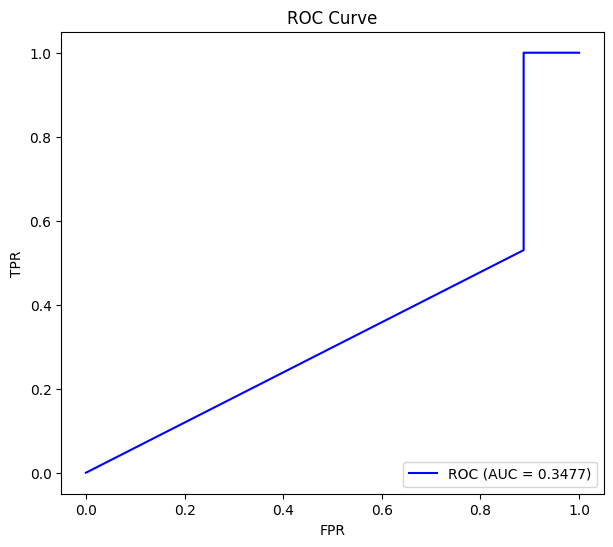

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Compute the AUC score for each class
auc_scores = []
for i in range(100):
    y_true_i = (np.array(true_label, dtype=object) == i)
    y_score_i = np.array(predected, dtype=object)
    auc_score_i = roc_auc_score(y_true_i, y_score_i)
    auc_scores.append(auc_score_i)

# Print the AUC scores
#print("AUC scores:", auc_scores)

fpr, tpr, _ = roc_curve(y_true_i, y_score_i)
auc_score = roc_auc_score(y_true_i, y_score_i)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [47]:
from PIL import Image
import glob
import numpy as np
import os

path = glob.glob("C:/Users/mo894398/Desktop/dataset/adv_Top5classes/Resnet34/CIFAR100_New_Safe/*")
testimages = []
yy_test = []

for imgg in correct_paths:
    with open(imgg, 'rb') as f1:
        img = Image.open(f1)
        img = img.convert('RGB')
        #newsize = (32, 32) 
        #im1 = im1.resize(newsize)
        img = img.resize((32, 32))
        img = np.array(img)
        testimages.append(img)
        
    pathSplit = os.path.normpath(imgg)
    labels = pathSplit.split(os.sep)
    try:
        labelss = labels[6].split("_")
        yy_test.append(int(labelss[0]))
    except:
        labelss = labels[8].split("_")
        yy_test.append(int(labelss[0]))
#for i in range(len(cs)):
#    yy_test.append(i)
#    right_labels.append(i)
#np.array([yy_test]).shape
yy_test = np.array(yy_test).reshape(len(correct_paths),1)

testimages = np.array(testimages)
yy_test.shape, testimages.shape

((4283, 1), (4283, 32, 32, 3))

In [76]:
# if you have issue with probs valus you need to add the missing classes by this function
# you have to take yy_test as plain first

countt = 0
cs = []
for i in range(101):
    if countt not in yy_test:
        #print (countt)
        cs.append(countt)
    countt += 1
print(cs)

[100]


In [48]:
#so,eventually,model.predict() should also be a 2d input
xx_test = testimages /255.0
nsamples, nx, ny, nrgb = xx_test.shape
x_test2 = xx_test.reshape((nsamples,32*32*nrgb))
probs = RandomForest.predict_proba(x_test2)

In [176]:
adversarial_Resnet = Resnet_top1_after_attack_adv
adversarial_Labels = adv_labels

In [177]:
correct_Resnet = Resnet_top1_after_attack_corr + Resnet_correct_paths
correct_Labels = right_labels + labels_correct_paths

In [90]:
miss_Resnet = Resnet_top1_after_attack_miss
miss_Labels = right_labels_miss

In [96]:
Resnet_all = adversarial_Resnet + correct_Resnet + miss_Resnet
labels_all = adversarial_Labels + correct_Labels + miss_Labels

In [98]:
len(labels_all)

10000

In [103]:
"""
        for x_label, x1 in zip(label1, top1_resnet):
            Resnet_top1_after_attack_corr.append(x1.cpu().detach().tolist())
            right_labels.append(x_label)

"""

Resnet_all = Resnet_top1_after_attack_corr + Resnet_correct_paths
#right_labels_all = right_labels + right_labels_adv

len(Resnet)


3515

In [147]:
couna = 0
for i, z in zip(miss_labels, Resnet_top1_after_attack_corr): #top_n_category_predictions.tolist()
    pathSplit = os.path.normpath(i)
    labels = pathSplit.split(os.sep)
    labels = labels[6].split("_")
    right_label = labels[0]
    
    #print(right_label, z[0])

    if int(right_label) == z[0]:
        couna += 1
print("adv images by Resnet: ", len(miss_labels))
print("no. of images of other models correctly predected even after the attack: ", couna)
print("percent of other models correctly predected even after the attack: ", couna/len(miss_labels)*100)

adv images by Resnet:  2694
no. of images of other models correctly predected even after the attack:  0
percent of other models correctly predected even after the attack:  0.0


In [22]:
from torchvision.utils import save_image

Resnet_top1_after_attack = []
dense_top1_after_attack = []
vgg_top1_after_attack = []
trans_top1_after_attack = []

Resnet_top1_after_attack_corr = []
dense_top1_after_attack_corr = []
vgg_top1_after_attack_corr = []
trans_top1_after_attack_corr = []

right_labels = []
adv_labels = []

adv_count = 0
corr_count = 0

index_a = []
index_b = []

with torch.no_grad():
    for (img1,label1), (img2, label2) in zip(testloader_attc_evl, testloader_attc_evl_vis):
        #embedding1 = Resnet(img1.cuda())
        #embedding2= desnetmodel(img1.cuda())
        #embedding3 = vgg(img1.cuda())
        embedding4 = trans_model(img2.cuda())

        top1_resnet = torch.topk(torch.softmax(embedding1,1),1)[1].cuda()
        top1_dense = torch.topk(torch.softmax(embedding2,1),1)[1].cuda()
        top1_vgg = torch.topk(torch.softmax(embedding3,1),1)[1].cuda()
        top1_trans = torch.topk(torch.softmax(embedding4[0],1),1)[1].cuda()

        for x_label, x1, x2, x3, x4 in zip(label1, top1_resnet, top1_dense, top1_vgg, top1_trans):
            if x_label.split(os.sep)[9].split("_")[0] != str(x1[0].cpu().detach().tolist()):
                #save_image(x3, f"adv_Top5classes/FGSM_v9/FGSM/correct/{x2}_{str(countter)}.jpg")
                Resnet_top1_after_attack.append(x1.cpu().detach().tolist())
                dense_top1_after_attack.append(x2.cpu().detach().tolist())
                vgg_top1_after_attack.append(x3.cpu().detach().tolist())
                trans_top1_after_attack.append(x4.cpu().detach().tolist())
                
                adv_labels.append(x_label)
                adv_count += 1
                index_a.append(i)

            else:
                Resnet_top1_after_attack_corr.append(x1.cpu().detach().tolist())
                dense_top1_after_attack_corr.append(x2.cpu().detach().tolist())
                vgg_top1_after_attack_corr.append(x3.cpu().detach().tolist())
                trans_top1_after_attack_corr.append(x4.cpu().detach().tolist())

                corr_count +=1
                right_labels.append(x_label)
                index_b.append(i)


NameError: name 'testloader_attc_evl_vis' is not defined

In [178]:
couna = 0
for i, z in zip(right_labels, dense_top1_after_attack_corr): #top_n_category_predictions.tolist()
    pathSplit = os.path.normpath(i)
    labels = pathSplit.split(os.sep)
    labels = labels[9].split("_")
    right_label = labels[0]
    
    #print(right_label, z[0])

    if int(right_label) == z[0]:
        couna += 1
print("adv images by Resnet: ", len(right_labels))
print("no. of images of other models correctly predected even after the attack: ", couna)
print("percent of other models correctly predected even after the attack: ", couna/len(right_labels)*100)

adv images by Resnet:  1047
no. of images of other models correctly predected even after the attack:  597
percent of other models correctly predected even after the attack:  57.02005730659025


In [91]:
listF_clean_a = []
listF_clean_b = []

def difference (list1, list2):
   list_dif = [element for element in list1 if element in list2]
   return list_dif

for i, j in zip(Resnet_top1_after_attack, vgg_top1_after_attack ):
    listF_clean_a.append(difference(i,j))

for i, j in zip(Resnet_top1_after_attack_corr, vgg_top1_after_attack_corr):
    listF_clean_b.append(difference(i,j))

count2 = 0
for ss in listF_clean_a:
    if not ss:
        count2 += 1

print("total image folde: ", (len(listF_clean_a) + len(listF_clean_b)))
print("no. of adv succ at Resnet: ", adv_count)
print("no. of correct predected by Resnet: ", corr_count)

print("--------------------------")
print("no. of detected images as adv by sys:", count2)
count3 = count2/len(listF_clean_a)
print("percent of detected images as adv by sys:" ,count3)
print("no. of un-detected images as adv by sys (faild):", len(listF_clean_a)-count2)
count4 = 1-count3
print("Attack Accuracy Rate:",count4)


dec = 0
for k, n in zip(listF_clean_b, right_labels): #right_labels with top_n_category_correct

    pathSplit = os.path.normpath(n)
    labels = pathSplit.split(os.sep)
    labels = labels[9].split("_")
    right_label = labels[0]

    if not k:
        continue
    
    elif int(right_label) == k[0]:
        
        dec += 1

print("---------------------------------")  
print("no. of images correct pred by system:", dec)
print("accuracy of correct pred by sestem", dec/len(listF_clean_b))

print("---------------------------------")  
print("no. of images missed pred by system:", len(listF_clean_b)- dec)
print("accuracy of missed pred by sestem", (len(listF_clean_b)- dec)/len(listF_clean_b))


total image folde:  4950
no. of adv succ at Resnet:  3903
no. of correct predected by Resnet:  1047
--------------------------
no. of detected images as adv by sys: 3204
percent of detected images as adv by sys: 0.8209069946195234
no. of un-detected images as adv by sys (faild): 699
Attack Accuracy Rate: 0.17909300538047657
---------------------------------
no. of images correct pred by system: 577
accuracy of correct pred by sestem 0.5510983763132761
---------------------------------
no. of images missed pred by system: 470
accuracy of missed pred by sestem 0.448901623686724


In [31]:

Resnet_top1_after_attack_corr = []
dense_top1_after_attack_corr = []
vgg_top1_after_attack_corr = []
trans_top1_after_attack_corr = []

right_labels = []

corr_count = 0

with torch.no_grad():
    for (img1,label1), (img2, label2) in zip(testloader_attc_evl, testloader_attc_evl_vis):
        embedding1 = Resnet(img1.cuda())
        embedding2=desnetmodel(img1.cuda())
        embedding3 = vgg(img1.cuda())
        embedding4 = trans_model(img2.cuda())

        top1_resnet = torch.topk(torch.softmax(embedding1,1),1)[1].cuda()
        top1_dense = torch.topk(torch.softmax(embedding2,1),1)[1].cuda()
        top1_vgg = torch.topk(torch.softmax(embedding3,1),1)[1].cuda()
        top1_trans = torch.topk(torch.softmax(embedding4[0],1),1)[1].cuda()

        for x_label, x1, x2, x3, x4 in zip(label1, top1_resnet, top1_dense, top1_vgg, top1_trans):
            Resnet_top1_after_attack_corr.append(x1.cpu().detach().tolist())
            dense_top1_after_attack_corr.append(x2.cpu().detach().tolist())
            vgg_top1_after_attack_corr.append(x3.cpu().detach().tolist())
            trans_top1_after_attack_corr.append(x4.cpu().detach().tolist())
                
            right_labels.append(x_label)
            corr_count += 1



In [73]:
listF_clean_a = []
listF_clean_b = []

def difference (list1, list2):
   list_dif = [element for element in list1 if element in list2]
   return list_dif


for i, j in zip(Resnet_top1_after_attack_corr, vgg_top1_after_attack):
    listF_clean_b.append(difference(i,j))



print("total image folde: ", (len(listF_clean_a) + len(listF_clean_b)))

print("--------------------------")

dec = 0
for k, n in zip(listF_clean_b, right_labels): #right_labels with top_n_category_correct

    pathSplit = os.path.normpath(n)
    labels = pathSplit.split(os.sep)
    labels = labels[6].split("_")
    right_label = labels[0]

    if not k:
        continue
    
    elif int(right_label) == k[0]:
        
        dec += 1

print("---------------------------------")  
print("no. of images correct pred by system:", dec)
print("accuracy of correct pred by sestem", dec/len(listF_clean_b))

print("---------------------------------")  
print("no. of images missed pred by system:", len(listF_clean_b)- dec)
print("accuracy of missed pred by sestem", (len(listF_clean_b)- dec)/len(listF_clean_b))

print("---------------------------------")
count2 = 0
for ss in listF_clean_b:
    if not ss:
        count2 += 1


print("no. of missed predected images:", count2)
count2 = count2/len(listF_clean_b)

print("percent of missed predected images:" ,count2)
count2 = 1-count2
print("Attack Accuracy Rate:",count2)




total image folde:  1047
--------------------------
---------------------------------
no. of images correct pred by system: 18
accuracy of correct pred by sestem 0.017191977077363897
---------------------------------
no. of images missed pred by system: 1029
accuracy of missed pred by sestem 0.9828080229226361
---------------------------------
no. of missed predected images: 1029
percent of missed predected images: 0.9828080229226361
Attack Accuracy Rate: 0.017191977077363862


In [76]:
listF_clean_b = []

def difference (list1, list2):
   list_dif = [element for element in list1 if element in list2]
   return list_dif


for i, j in zip(adv_labels, dense_top1_after_attack):
    
    pathSplit = os.path.normpath(i)
    labels = pathSplit.split(os.sep)
    labels = labels[9].split("_")
    right_label = labels[0]

    
    listF_clean_b.append(difference([int(right_label)],j))


count2 = 0
for ss in listF_clean_b:
    if not ss:
        count2 += 1


print("no. of unmatched adv images with right labels:", count2)
count2 = count2/len(listF_clean_b)

print("percent of unmatched adv images with right labelses:" ,count2)
count2 = 1-count2
print("percent of matched adv images with right labelses:",count2)



no. of unmatched adv images with right labels: 3418
percent of unmatched adv images with right labelses: 0.8757366128619011
percent of matched adv images with right labelses: 0.12426338713809892


In [56]:
with open('third_paper_outputs_txt/Resnet_top1_after_attack.txt', 'w') as f:
#with open('/content/drive/My Drive/Perceptual hashing/Results/faceAlt_10epo_512to128to32_v9.txt', 'w') as f:
    for item in Resnet_top1_after_attack:
        for i in item:
            f.write(str(i)+str(','))


with open('third_paper_outputs_txt/right_labels.txt', 'w') as f:
#with open('/content/drive/My Drive/Perceptual hashing/Results/faceAlt_10epo_512to128to32_v9.txt', 'w') as f:
    for item in right_labels:
        f.write(item+str(','))

In [ ]:
from torchvision.utils import save_image

Resnet_top1_after_attack = []
desne_top1_after_attack = []
vgg_top1_after_attack = []
trans_top1_after_attack = []

right_labels = []
countter = 0
with torch.no_grad():
    for i,(img,label) in enumerate(testloader_attc_evl):
       
        embedding1=Resnet(img.cuda())
        embedding2=densemodel(img.cuda())
        embedding3 = vgg(img.cuda())
        #embedding4 = trans_model(img.cuda())
        
        top1_resnet = torch.topk(torch.softmax(embedding1,1),1)[1].cuda()
        top1_dense = torch.topk(torch.softmax(embedding2,1),1)[1].cuda()
        top1_vgg = torch.topk(torch.softmax(embedding3,1),1)[1].cuda()
        #top1_trans = torch.topk(torch.softmax(embedding4[0],1),1)[1].cuda()

        for x1, x2, x3 in zip(top1_resnet, top1_dense, top1_vgg):
            Resnet_top1_after_attack.append(x1.cpu().detach().tolist())
            dense_top1_after_attack.append(x2.cpu().detach().tolist())
            vgg_top1_after_attack.append(x3.cpu().detach().tolist())
            vgg_top1_after_attack.append(x3.cpu().detach().tolist())
            #trans_top1_after_attack.append(x3.cpu().detach().tolist())
        for x_label in label:
            right_labels.append(x_label)



In [ ]:

ResnNo = 0
VggNo = 0

print("no of images: ", len(Resnet_top1_after_attack))
print("no. of labels: ", len(adv_labels))
      
for i, j, z in zip(adv_labels, Resnet_top1_after_attack, dense_top1_after_attack):

    
    pathSplit = os.path.normpath(i)
    labels = pathSplit.split(os.sep)
    labels = labels[9].split("_")
    right_label = labels[0]


    if right_label in str(j):
        ResnNo += 1

    if right_label in str(z):
        VggNo += 1 

print("Resnet corr_pred no.: ", ResnNo, " with acc of: ", (ResnNo/len(right_labels))*100)
print("Vgg16 corr_pred no.: ", VggNo, " with acc of: ", (VggNo/len(right_labels))*100)

#print("ResNet_top1 accuracy:", (ResnNo/len(right_labels))*100)




In [ ]:
# doing test by run whole adv images on Resnet and Densnet, then run the cell above, I conclude:
#by running Resnet and densnet on adv images, I found that 
# the percentage doesn't changed. when I run Randomforest or transformer,
# the percentage of the attack decrease!

### RandomForest

In [40]:
from PIL import Image
import glob
import numpy as np
import os

#path = glob.glob("C:/Users/mo894398/Desktop/dataset/adv_Top5classes/FGSM_v12/FGSM/adv/*")
testimages = []
yy_test = []

for imgg in adversarial_Labels:
    with open(imgg, 'rb') as f1:
        img = Image.open(f1)
        img = img.convert('RGB')
        img = img.resize((32,32))
        img = np.array(img)
        testimages.append(img)
        
    pathSplit = os.path.normpath(imgg)
    labels = pathSplit.split(os.sep)
    try:
        labelss = labels[6].split("_")
        yy_test.append(int(labelss[0]))
    except:
        labelss = labels[9].split("_")
        yy_test.append(int(labelss[0]))
#for i in range(len(cs)):
#    yy_test.append(i)
#    right_labels.append(i)
#np.array([yy_test]).shape
yy_test = np.array(yy_test).reshape(len(adversarial_Labels),1)

testimages = np.array(testimages)
yy_test.shape, testimages.shape

NameError: name 'adversarial_Labels' is not defined

In [179]:
# if you have issue with probs valus you need to add the missing classes by this function
# you have to take yy_test as plain first

countt = 0
cs = []
for i in range(101):
    if countt not in yy_test:
        #print (countt)
        cs.append(countt)
    countt += 1
print(cs)

[100]


In [363]:
yy_test[0] = 80



In [ ]:
# then take the values from above
# for notNormlized test

yy_test[0] = 2
yy_test[1] = 3
yy_test[2] = 4
yy_test[3] = 6
yy_test[4] = 11
yy_test[5] = 12
yy_test[6] = 13
yy_test[7] = 19
yy_test[8] = 21
yy_test[9] = 24
yy_test[10] = 27

yy_test[11] = 30
yy_test[12] = 31
yy_test[13] = 34
yy_test[14] = 35
yy_test[15] = 36
yy_test[16] = 38
yy_test[17] = 43
yy_test[18] = 46
yy_test[19] = 47
yy_test[20] = 51

yy_test[21] = 52
yy_test[22] = 55
yy_test[23] = 62
yy_test[24] = 63
yy_test[25] = 64
yy_test[26] = 65
yy_test[27] = 66
yy_test[28] = 68
yy_test[29] = 72
yy_test[30] = 73

yy_test[31] = 74
yy_test[32] = 75
yy_test[33] = 77
yy_test[34] = 80
yy_test[35] = 81
yy_test[36] = 88
yy_test[37] = 90
yy_test[38] = 93
yy_test[39] = 95
yy_test[40] = 96

yy_test[41] = 97
yy_test[42] = 98
yy_test[43] = 100

#[2, 3, 4, 6, 11, 12, 13, 19, 21, 24, 27
#30, 31, 34, 35, 36, 38, 43, 46, 47, 51,
#52, 55, 62, 63, 64, 65, 66, 68, 72, 73, 
#74, 75, 77, 80, 81, 88, 90, 93, 95, 96,
# 97, 98, 100]






In [33]:
#so,eventually,model.predict() should also be a 2d input
xx_test = testimages /255.0
nsamples, nx, ny, nrgb = xx_test.shape
x_test2 = xx_test.reshape((nsamples,nx*ny*nrgb))
probs = RandomForest.predict_proba(x_test2)

In [49]:
def difference (list1, list2):
   list_dif = [element for element in list1 if element in [list2]]
   return list_dif

top_n_category_predictions = np.argsort(probs)[:,:-1-1:-1]
listF_clean = []
   
for i, j, l in zip(top_n_category_predictions.tolist(), adv_labels, yy_test):
   check = difference(i,j)
   if not check:
      listF_clean.append([l]) # for miss and adv
      #listF_clean.append([555])
   else:
      listF_clean.append(check)

#for ss in range(3396):
#    if not listF_clean[ss]:
#        listF_clean[ss] = 888.0

true_label = yy_test
predected = listF_clean



"""
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = np.array(true_label)
y_score = np.array(predected)

# Compute the AUC score for each class
auc_scores = []
for i in range(100):
    y_true_i = (y_true == i).astype(int)
    y_score_i = y_score
    auc_score_i = roc_auc_score(y_true_i, y_score_i)
    auc_scores.append(auc_score_i)

# Compute the macro-averaged AUC score
macro_auc_score = np.mean(auc_scores)

# Print the AUC scores
print("AUC scores:", auc_scores)
print("Macro-averaged AUC score:", macro_auc_score)
"""


'\nimport numpy as np\nfrom sklearn.metrics import roc_auc_score\n\ny_true = np.array(true_label)\ny_score = np.array(predected)\n\n# Compute the AUC score for each class\nauc_scores = []\nfor i in range(100):\n    y_true_i = (y_true == i).astype(int)\n    y_score_i = y_score\n    auc_score_i = roc_auc_score(y_true_i, y_score_i)\n    auc_scores.append(auc_score_i)\n\n# Compute the macro-averaged AUC score\nmacro_auc_score = np.mean(auc_scores)\n\n# Print the AUC scores\nprint("AUC scores:", auc_scores)\nprint("Macro-averaged AUC score:", macro_auc_score)\n'

In [35]:
clean_label = yy_test
clean_pred = listF_clean

In [50]:
adv_label = true_label
adv_pred = predected

In [54]:
len(clean_label)

4283

In [52]:
import numpy as np

labels__ = []
our_model_pred = clean_pred + adv_pred
labels__ = np.concatenate((clean_label, adv_label))
#labels__ = np.concatenate((labels__, adv_label))


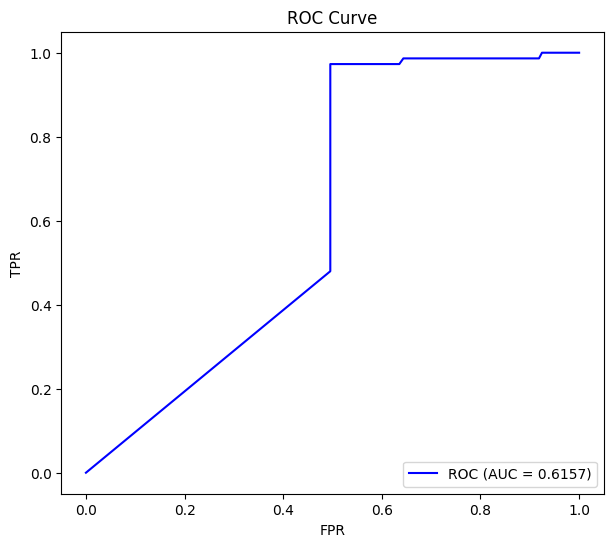

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Compute the AUC score for each class
auc_scores = []
for i in range(100):
    y_true_i = (np.array(labels__, dtype=object) == i)
    y_score_i = np.array(our_model_pred, dtype=object)
    auc_score_i = roc_auc_score(y_true_i, y_score_i)
    auc_scores.append(auc_score_i)

# Print the AUC scores
#print("AUC scores:", auc_scores)

fpr, tpr, _ = roc_curve(y_true_i, y_score_i)
auc_score = roc_auc_score(y_true_i, y_score_i)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [170]:
from sklearn.metrics import top_k_accuracy_score

#probs = RandomForest.predict_proba(x_test2)
top_1 = top_k_accuracy_score(yy_test, probs, k=1)
top_2 = top_k_accuracy_score(yy_test, probs, k=2)
top_3 = top_k_accuracy_score(yy_test, probs, k=3)
top_4 = top_k_accuracy_score(yy_test, probs, k=4)
top_5 = top_k_accuracy_score(yy_test, probs, k=5)

top_6 = top_k_accuracy_score(yy_test, probs, k=6)
top_7 = top_k_accuracy_score(yy_test, probs, k=7)
top_8 = top_k_accuracy_score(yy_test, probs, k=8)
top_9 = top_k_accuracy_score(yy_test, probs, k=9)

top_10 = top_k_accuracy_score(yy_test, probs, k=10)
top_20 = top_k_accuracy_score(yy_test, probs, k=20)
top_30 = top_k_accuracy_score(yy_test, probs, k=30)

print("top_1_accuracy", top_1)
print("top_2_accuracy", top_2)
print("top_3_accuracy", top_3)
print("top_4_accuracy", top_4)
print("top_5_accuracy", top_5)
print("top_6_accuracy", top_6)
print("top_7_accuracy", top_7)
print("top_8_accuracy", top_8)
print("top_9_accuracy", top_9)
print("top_10_accuracy", top_10)
print("top_20_accuracy", top_20)
print("top_30_accuracy", top_30)

# Sort desc and only extract the top-n
#top_n_category_predictions = np.argsort(probs)[:,:-5-1:-1]
#print("top_5_values", top_n_category_predictions[1])
#print("correct_clas", y_test[1])

#ResNet accuracy: 0.2358
#RandomForest:
    #top_5_accuracy 0.0824
    #top_10_accuracy 0.146
    #top_20_accuracy 0.2593
    #top_25_accuracy 0.3106
    #top_30_accuracy 0.3621


top_1_accuracy 0.24450811843361986
top_2_accuracy 0.35148042024832854
top_3_accuracy 0.4164278892072588
top_4_accuracy 0.46609360076408785
top_5_accuracy 0.5052531041069723
top_6_accuracy 0.5319961795606495
top_7_accuracy 0.5635148042024832
top_8_accuracy 0.5902578796561605
top_9_accuracy 0.6045845272206304
top_10_accuracy 0.6303724928366762
top_20_accuracy 0.766953199617956
top_30_accuracy 0.8347659980897804


In [ ]:
"""
RandomForest:
    
    top_5_accuracy 0.4235
    top_10_accuaracy: 0.5279
    top_20_accuaracy: 0.6507
    
    #FGSM:
    top_5_accuracy_original: 0.39672977624784855
    top_5_accuracy_adv: 0.39759036144578314
        
    top_10_accuracy_original 
    top_10_accuracy_adv 0.502474182444062
    
    top_20_accuracy_original 
    top_20_accuracy_adv 0.6269363166953529

    #PGD:
    top_5_accuracy_original 0.4133
    top_5_accuracy_adv 0.4188
    
    top_10_accuracy_original 0.519
    top_10_accuracy_adv 0.5326
    
    top_20_accuracy_original 0.6453
    top_20_accuracy_adv 0.6429

    #Deepfool:
    top_5_accuracy_org: 0.4184836967393479
    top_5_accuracy_adv: 0.41878375675135027
        
    top_10_accuracy_original 0.5225045009001801
    top_20_accuracy_adv 0.5225045009001801

    top_20_accuracy_original 0.6408281656331266
    top_20_accuracy_adv 0.6428285657131426

    
ResNet:
    top_1_accuracy_original: 0.7221
    top_5_accuracy_original: 0.92
        
    #FGSM:
    top_5_accuracy_adv: 0.44 + 0.227 = 0.66
        
    #PGD:
    top_5_accuracy_adv: 0.4483 + 0.055 = 0.49
        
    #DeepFool:
    top_5_accuracy_adv: 
        
        
        
Normlized folder (2011):
    Randomforest:
        top_5_accuracy: 0.5261064147190453
            
Normlized folder clean (7989):
    Randomforest:
        top_5_accuracy: 0.3915383652522218
"""

In [145]:
def difference (list1, list2):
   list_dif = [element for element in list1 if element in list2]
   return list_dif

scores = []
for c in range(1,101):
   top_n_category_predictions = np.argsort(probs)[:,:-c-1:-1]
   listF_clean = []
   
   for i, j in zip(top_n_category_predictions.tolist(), miss_Resnet):
      listF_clean.append(difference(i,j))


   dec = 0
   for k, n in zip(listF_clean, yy_test): #right_labels with top_n_category_correct
   #print(n,k)
   #assert False
      if not k:
         dec += 1
         #continue
      elif int(n) == k[0]:
         #print(n,k)
         #dec += 1
         continue
   
   #scores.append(dec/len(listF_clean))
   scores.append(dec)
#print("no. of images:", dec)
#print("accuracy", dec/len(listF_clean))



In [146]:
with open('third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_miss_b.txt', 'w') as f:
#with open('/content/drive/My Drive/Perceptual hashing/Results/faceAlt_10epo_512to128to32_v9.txt', 'w') as f:
    for item in scores:
        f.write(str(item)+str(','))

In [147]:
len(miss_Labels)

2694

In [149]:
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_miss_b.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]

#content3=sorted(content2[:-1], key = lambda x:float(x))

for i in range(0, len(content2)):
    content2[i] = 2694-float(content2[i])

In [150]:
with open('third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_miss_e.txt', 'w') as f:
#with open('/content/drive/My Drive/Perceptual hashing/Results/faceAlt_10epo_512to128to32_v9.txt', 'w') as f:
    for item in content2:
        f.write(str(item)+str(','))

In [171]:
def difference (list1, list2):
   list_dif = [element for element in list1 if element in list2]
   return list_dif

#top_ = top_k_accuracy_score(yy_test, probs, k=10) #y_test
#print("accuracy of RF:", top_)
top_n_category_predictions = np.argsort(probs)[:,:-1-1:-1]
#top_n_category_correct = np.argsort(np.array(probs_adv).squeeze())[:,:-1-1:-1]

#c = np.array(Resnet_top5_adv).tolist()
#d = np.array(Resnet_top5_clean).tolist()
#b = Resnet_top1_before_attack
e = Resnet_top1_after_attack
#a = Resnet_top1
#cc = initLabel_cor[0]
#mm = initLabel_mis[0]
#aa = initLabel_adv[0]
#o = org_label_[0]

# c, m , a are the target labels
# cc, mm, aa are the target, the predect, the final labels

# here are the top_30 with their target labels extracted
#top_n_category_itsLabel_cor = top_n_category_correct     # this top_k when the labels are from the predect
#top_n_category_itsLabel_mis = top_n_category_miss
#top_n_category_itsLabel_adv = top_n_category_adv

#clean accuracy calculation
listF_clean = []
for i, j in zip(top_n_category_predictions.tolist(), e):
#for i, j in zip(top_n_category_correct, e):
    listF_clean.append(difference(i,j))
    #if j in i:
    #    listF_clean.append(j)


In [172]:
#right_labels with top_n_category_correct with first cell of Resnet evaluation
#yy_test with top_n_category_predictions with secend cell of Resnet evaluation

dec = 0
for k, n in zip(listF_clean, yy_test): #right_labels with top_n_category_correct
    #print(n,k)
    #assert False
    if not k:
        continue
    elif int(n) == k[0]:
        #print(n,k)
        dec += 1

print("no. of images:", dec)
print("accuracy", dec/len(listF_clean))

no. of images: 5
accuracy 0.004775549188156638


In [141]:
count2 = 0
for ss in listF_clean:
    if not ss:
        count2 += 1

print("no. of images:", count2)
count2 = count2/len(listF_clean)

print("Unmatched:" ,count2)
count2 = 1-count2
print("Attack Accuracy Rate:",count2)

no. of images: 1030
Unmatched: 0.9837631327602674
Attack Accuracy Rate: 0.01623686723973261


In [ ]:
countempty = []
countCorrectPred = []
dec = 0
for k, n in zip(listF_clean, m):
    if not k:
        #print(n,k)
        countempty.append(k)
        #dec += 1
        #continue
        
    elif k == n:
        #print(n,k)
        dec += 1
        countCorrectPred.append(k)


#reamilList= 2011 - len(countempty)
#print("correct predect no.:", dec)
#print("length of the remail list (not empty):", reamilList)
#print("acc", dec/reamilList)

#print("accuracy", dec/(len(listF_clean)- len(countempty)))
print("accuracy", dec/len(listF_clean))

In [ ]:
countempty = []
countCorrectPred = []
dec = 0
for k, n in zip(listF_clean, m):
    if not k:
        #print(n,k)
        countempty.append(k)
        #dec += 1
        #continue
        
    elif k in n:
        #print(n,k)
        dec += 1
        countCorrectPred.append(k)

print("accuracy", (dec + len(countempty))/len(listF_clean))

In [ ]:
listF_clean = []

def difference (list1, list2):
   list_dif = [element for element in list1 if element in list2]
   return list_dif

for i, j in zip(adv_Resnet_top1_after_attack, adv_dense_top1_after_attack ):
#for i, j in zip(top_n_category_correct, e):
   if not i:
      continue
   else:
    listF_clean.append(difference(i,j))

In [ ]:
dec = 0
for k, n in zip(listF_clean, right_labels): #right_labels with top_n_category_correct
    #print(n,k)
    #assert False
    pathSplit = os.path.normpath(n)
    labels = pathSplit.split(os.sep)
    labels = labels[6].split("_")
    right_label = labels[0]
    #print(k[0])
    #print(right_label)
    #assert False
    if not k:
        continue
    
    elif int(right_label) == k[0]:
        
        #print(n,k)
        dec += 1
    

print("no. of images:", dec)
print("accuracy", dec/len(listF_clean))

In [ ]:
count2 = 0
for ss in listF_clean:
    if not ss:
        count2 += 1

print(len(listF_clean))
print("no. of images:", count2)
count2 = count2/len(listF_clean)

print("Unmatched:" ,count2)
count2 = 1-count2
print("Attack Accuracy Rate:",count2)


In [19]:
from models.densenet import densenet121
#from models.vgg import vgg16_bn

desnetmodel = densenet121()
optimizer = torch.optim.SGD(desnetmodel.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
desnetmodel.load_state_dict(torch.load('C:/Users/mo894398/Desktop/dataset/pytorch-cifar100-master/checkpoint/densenet121/Wednesday_25_January_2023_17h_34m_20s/densenet121-200-regular.pth'))
desnetmodel.eval()
desnetmodel.to(device)

#vgg = vgg16_bn()
#optimizer = torch.optim.SGD(vgg.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
#vgg.load_state_dict(torch.load('C:/Users/mo894398/Desktop/dataset/pytorch-cifar100-master/checkpoint/vgg16/Friday_27_January_2023_09h_39m_03s/vgg16-200-regular.pth'))

#vgg.eval()
#vgg.to(device)


DenseNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (features): Sequential(
    (dense_block_layer_0): Sequential(
      (bottle_neck_layer_0): Bottleneck(
        (bottle_neck): Sequential(
          (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU(inplace=True)
          (5): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
      )
      (bottle_neck_layer_1): Bottleneck(
        (bottle_neck): Sequential(
          (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(12

In [18]:
from models.vgg import vgg16_bn

vgg = vgg16_bn()
optimizer = torch.optim.SGD(vgg.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
vgg.load_state_dict(torch.load('C:/Users/mo894398/Desktop/dataset/pytorch-cifar100-master/checkpoint/vgg16/Friday_27_January_2023_09h_39m_03s/vgg16-200-regular.pth'))

vgg.eval()
vgg.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [10]:
import numpy as np
from models.modeling import VisionTransformer, CONFIGS

config = CONFIGS["ViT-B_16"]

num_classes = 100

model = VisionTransformer(config, 224, zero_head=True, num_classes=num_classes)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

model.load_state_dict(torch.load('ViT-pytorch-main/output/cifar10-100_500_checkpoint.bin'))
model.eval()

trans_model = model

trans_model.to(device)

VisionTransformer(
  (transformer): Transformer(
    (embeddings): Embeddings(
      (patch_embeddings): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): Encoder(
      (layer): ModuleList(
        (0): Block(
          (attention_norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (ffn_norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (ffn): Mlp(
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (attn): Attention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (out): Linear(in_features=768, out_features=768, bias=True)
     

In [138]:
len(correct_Labels)

3515

In [140]:
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_correct_a.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]

#content3=sorted(content2[:-1], key = lambda x:float(x))

for i in range(0, len(content2)):
    content2[i] = 3515-float(content2[i])



In [141]:
with open('third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_correct_d.txt', 'w') as f:
#with open('/content/drive/My Drive/Perceptual hashing/Results/faceAlt_10epo_512to128to32_v9.txt', 'w') as f:
    for item in content2:
        f.write(str(item)+str(','))

top: 2.657142857142857 accuracy: 2008.4857142857143
top: 7.102702702702703 accuracy: 2449.7783783783784


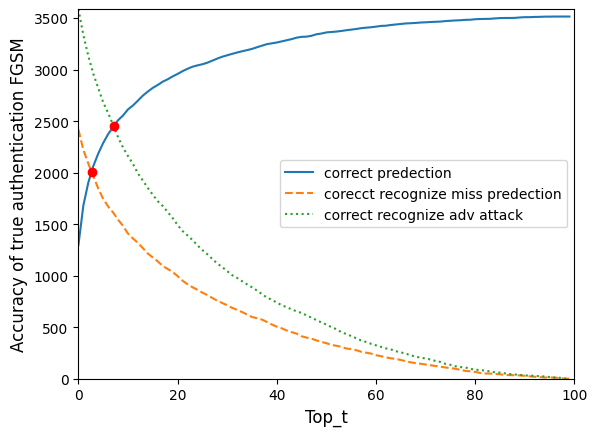

In [156]:

import matplotlib.pyplot as plt
import numpy as np
from shapely import LineString


file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_correct_a.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
correct_a = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/miss_b.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
miss_b = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_adv_c.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
adv_c = content2
#----------------------------------------------------------------


x1 = np.arange(0, 100, 1).tolist()

plt.plot(x1, correct_a, label = "correct predection", linestyle="-")
plt.plot(x1, miss_b, label = "corecct recognize miss predection", linestyle="--")
plt.plot(x1, adv_c, label = "correct recognize adv attack", linestyle=":")

plt.xlim(0, 100)
plt.ylim(0, 3587)

# naming the x axis
plt.xlabel('Top_t',fontsize=12)

# naming the y axis
plt.ylabel('Accuracy of true authentication FGSM',fontsize=12)

line_1 = LineString(np.column_stack((x1, correct_a)))
line_2 = LineString(np.column_stack((x1, miss_b)))
line_3 = LineString(np.column_stack((x1, adv_c)))

intersection1 = line_1.intersection(line_2)
intersection2 = line_1.intersection(line_3)

x,y = intersection1.xy
print("top:", x[0], "accuracy:", y[0])
x,y = intersection2.xy
print("top:", x[0], "accuracy:", y[0])

plt.plot(*intersection1.xy, 'ro')
plt.plot(*intersection2.xy, 'ro')

plt.legend()
#plt.legend(loc='center right')

plt.show()


top: 6.157957893279385 accuracy: 0.6168665338492189
top: 7.115846580275284 accuracy: 0.6395370874890431


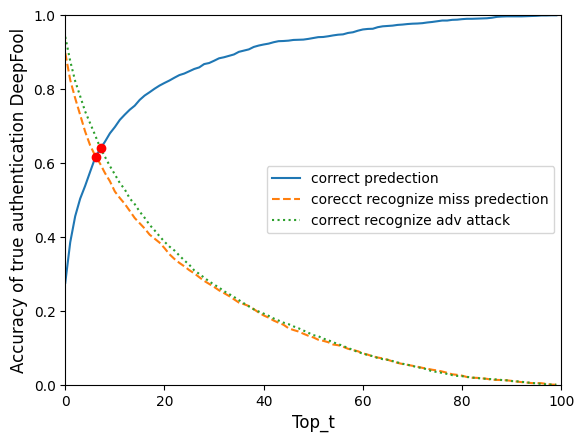

In [341]:

import matplotlib.pyplot as plt
import numpy as np
from shapely import LineString


file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/deepfool_correct_a.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
correct_a = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/miss_b.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
miss_b = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/deepfool_adv_c.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
adv_c = content2
#----------------------------------------------------------------


x1 = np.arange(0, 100, 1).tolist()

plt.plot(x1, correct_a, label = "correct predection", linestyle="-")
plt.plot(x1, miss_b, label = "corecct recognize miss predection", linestyle="--")
plt.plot(x1, adv_c, label = "correct recognize adv attack", linestyle=":")

plt.xlim(0, 100)
plt.ylim(0, 1)

# naming the x axis
plt.xlabel('Top_t',fontsize=12)

# naming the y axis
plt.ylabel('Accuracy of true authentication DeepFool',fontsize=12)

line_1 = LineString(np.column_stack((x1, correct_a)))
line_2 = LineString(np.column_stack((x1, miss_b)))
line_3 = LineString(np.column_stack((x1, adv_c)))

intersection1 = line_1.intersection(line_2)
intersection2 = line_1.intersection(line_3)

x,y = intersection1.xy
print("top:", x[0], "accuracy:", y[0])
x,y = intersection2.xy
print("top:", x[0], "accuracy:", y[0])

plt.plot(*intersection1.xy, 'ro')
plt.plot(*intersection2.xy, 'ro')

plt.legend()
#plt.legend(loc='center right')

plt.show()


top: 6.448788221663629 accuracy: 0.6356128000650437
top: 7.3857613537660995 accuracy: 0.6629936991137259


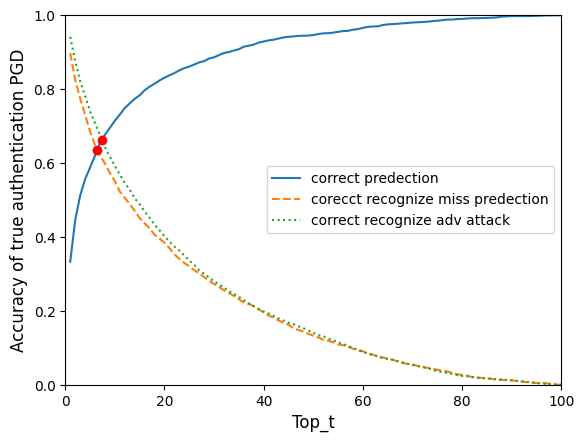

In [43]:

import matplotlib.pyplot as plt
import numpy as np
from shapely import LineString


file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/pgd_correct_a.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
correct_a = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/miss_b.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
miss_b = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/pgd_adv_c.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
adv_c = content2
#----------------------------------------------------------------


x1 = np.arange(1, 101, 1).tolist()

plt.plot(x1, correct_a, label = "correct predection", linestyle="-")
plt.plot(x1, miss_b, label = "corecct recognize miss predection", linestyle="--")
plt.plot(x1, adv_c, label = "correct recognize adv attack", linestyle=":")

plt.xlim(0, 100)
plt.ylim(0, 1)

# naming the x axis
plt.xlabel('Top_t',fontsize=12)

# naming the y axis
plt.ylabel('Accuracy of true authentication PGD',fontsize=12)

line_1 = LineString(np.column_stack((x1, correct_a)))
line_2 = LineString(np.column_stack((x1, miss_b)))
line_3 = LineString(np.column_stack((x1, adv_c)))

intersection1 = line_1.intersection(line_2)
intersection2 = line_1.intersection(line_3)

x,y = intersection1.xy
print("top:", x[0], "accuracy:", y[0])
x,y = intersection2.xy
print("top:", x[0], "accuracy:", y[0])

plt.plot(*intersection1.xy, 'ro')
plt.plot(*intersection2.xy, 'ro')

plt.legend()
#plt.legend(loc='center right')

plt.show()


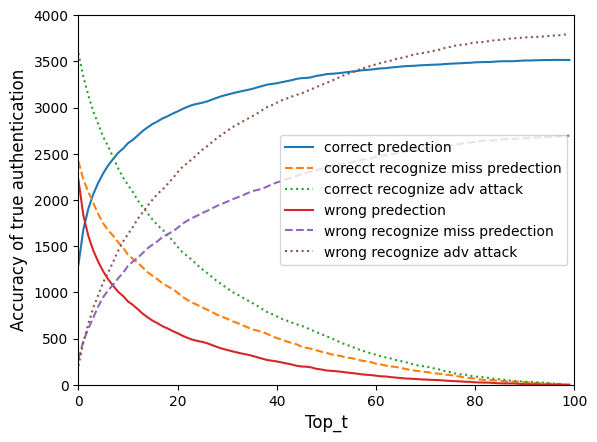

In [137]:

import matplotlib.pyplot as plt
import numpy as np
from shapely import LineString


file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_correct_a.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
correct_a = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/miss_b.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
miss_b = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_adv_c.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
adv_c = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_correct_d.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
correct_d = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/miss_e.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
miss_e = content2
#----------------------------------------------------------------
file1 = open("C:/Users/mo894398/Desktop/dataset/third_paper_outputs_txt/plot/ready/no_Of_img/fgsm_adv_f.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
for i in range(0, len(content2)):
    content2[i] = float(content2[i])
adv_f = content2
#----------------------------------------------------------------

x1 = np.arange(0, 100, 1).tolist()

plt.plot(x1, correct_a, label = "correct predection", linestyle="-")
plt.plot(x1, miss_b, label = "corecct recognize miss predection", linestyle="--")
plt.plot(x1, adv_c, label = "correct recognize adv attack", linestyle=":")

plt.plot(x1, correct_d, label = "wrong predection", linestyle="-")
plt.plot(x1, miss_e, label = "wrong recognize miss predection", linestyle="--")
plt.plot(x1, adv_f, label = "wrong recognize adv attack", linestyle=":")

plt.xlim(0, 100)
plt.ylim(0, 4000)

# naming the x axis
plt.xlabel('Top_t',fontsize=12)

# naming the y axis
plt.ylabel('Accuracy of true authentication',fontsize=12)

plt.legend()
#plt.legend(loc='center right')

plt.show()


In [ ]:

ca = 0.2
cb = 0.1
cc = 0.1
cd = 0.1
ce = 0.1
cf = 0.4

ca = 0.4
cb = 0.2
cc = 0.1
cd = 0.1
ce = 0.1
cf = 0.1

ca = 0.4
cb = 0.1
cc = 0.1
cd = 0.2
ce = 0.1
cf = 0.1

whole_top = []

for a, b, c, d, e, f in zip(correct_a, miss_b, adv_c, correct_d, miss_e, adv_f):
    ff = cf*f + ce*e + cd*d - cc*c - cb*b - ca*a
   
    whole_top.append(ff)


In [138]:

ca = 0.2
cb = 0.1
cc = 0.1
cd = 0.1
ce = 0.1
cf = 0.4

whole_top_a = []

for a, b, c, d, e, f in zip(correct_a, miss_b, adv_c, correct_d, miss_e, adv_f):
    ff = cf*f + ce*e + cd*d - cc*c - cb*b - ca*a
   
    whole_top_a.append(ff)



In [139]:


ca = 0.4
cb = 0.2
cc = 0.1
cd = 0.1
ce = 0.1
cf = 0.1

whole_top_b = []

for a, b, c, d, e, f in zip(correct_a, miss_b, adv_c, correct_d, miss_e, adv_f):
    ff = cf*f + ce*e + cd*d - cc*c - cb*b - ca*a
   
    whole_top_b.append(ff)



In [140]:


ca = 0.4
cb = 0.1
cc = 0.1
cd = 0.2
ce = 0.1
cf = 0.1

whole_top_c = []

for a, b, c, d, e, f in zip(correct_a, miss_b, adv_c, correct_d, miss_e, adv_f):
    ff = cf*f + ce*e + cd*d - cc*c - cb*b - ca*a
   
    whole_top_c.append(ff)



In [142]:
index = whole_top_b.index(min(whole_top_b))

print("top: ", index)
print("value: ", min(whole_top_b))

top:  3
value:  -1213.4


In [145]:
top_n = 14

ff = cf*adv_f[top_n] + ce*miss_e[top_n] + cd*correct_d[top_n] - cc*adv_c[top_n] - cb*miss_b[top_n] - ca*correct_a[top_n]

fpr_list = []
fnr_list = []
acc = []

Sensitivity = correct_a[top_n] / (correct_a[top_n] + correct_d[top_n])
Specificity = (miss_b[top_n]+adv_c[top_n]) / (miss_b[top_n]+adv_c[top_n]+miss_e[top_n]+adv_f[top_n] )
fnr_f = correct_d[top_n] / (correct_a[top_n] + correct_d[top_n])
accuracies = (correct_a[top_n]+miss_b[top_n]+adv_c[top_n])/(correct_a[top_n]+miss_b[top_n]+adv_c[top_n]+correct_d[top_n]+miss_e[top_n]+adv_f[top_n] )

print("ff:", ff)
print("TPR:", Sensitivity)
print("FPR:", 1-Specificity)
print("TNR:", Specificity)
print("FNR:", fnr_f)
print("Accuracies:", accuracies)


ff: -933.9
TPR: 0.7928876244665718
FPR: 0.5272166538164996
TNR: 0.4727833461835004
FNR: 0.20711237553342818
Accuracies: 0.5853


In [72]:
fpr_list = []
fnr_list = []
acc = []
for a, b, c, d, e, f in zip(correct_a, miss_b, adv_c, correct_d, miss_e, adv_f):
    
    TPR = a / (a + d)
    FNR = (b+c) / ((b+c) + (e+f))

    accuracies = (a+b+c)/(a+b+c+d+e+f)

    fpr_list.append(TPR)
    fnr_list.append(FNR)
    acc.append(accuracies)

In [134]:
from sklearn import metrics

TPR = []
TNR = []
FPR = []
FNR = []
acc = []

for a, b, c, d, e, f in zip(correct_a, miss_b, adv_c, correct_d, miss_e, adv_f):
    
    Sensitivity = a / (a + d)
    Specificity = (b+c) / (b+c+e+f)
    fnr_f = d / (a + d)
    accuracies = (a+b+c)/(a+b+c+d+e+f)

    TPR.append(Sensitivity)
    TNR.append(Specificity)
    FPR.append(1-Specificity)
    FNR.append(fnr_f)
    acc.append(accuracies)

FPR.insert(0,0.0)
TPR.insert(0,0.0)
print("AUC:", metrics.auc(FPR, TPR))

AUC: 0.7232887141899843


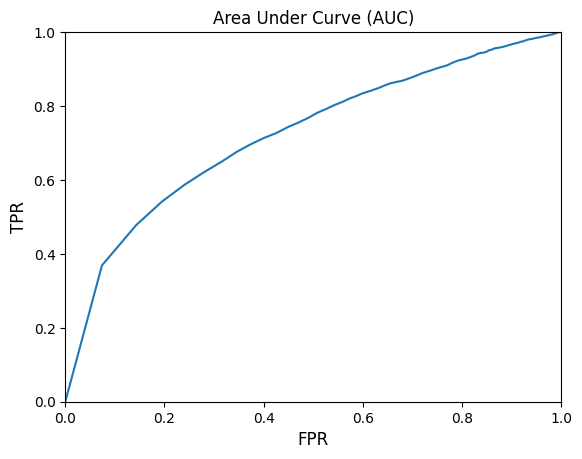

In [135]:

import matplotlib.pyplot as plt
import numpy as np
from shapely import LineString


x1 = np.arange(0, 100, 1).tolist()

plt.plot(FPR, TPR, linestyle="-")
#plt.plot(x1, acc, label = "Healthcare", linestyle="--")
#plt.plot(x1, whole_top_c, label = "Detecting inappropriate content", linestyle=":")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.title('Area Under Curve (AUC)')

# naming the x axis
plt.xlabel('FPR',fontsize=12)

# naming the y axis
plt.ylabel('TPR',fontsize=12)

#plt.legend()
#plt.legend(loc='center right')

plt.show()


#the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left-side are better.

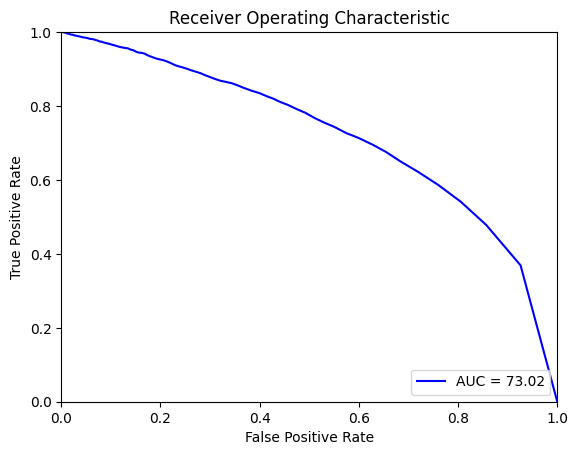

In [79]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fnr_list, fpr_list, 'b', label = 'AUC = %0.2f' % 73.02)
plt.legend(loc = 'lower right')
##plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()